In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import glob

In [26]:
sns.set_context("talk", font_scale=1.0)

In [27]:
# Directory containing the JSON files
directory_path = 'validate/'

# List to store the processed data
all_experiments = []

# Iterate through all JSON files in the directory
for file_path in glob.glob(os.path.join(directory_path, '**/*.json'), recursive=True):
    with open(file_path, 'r') as file:
        print(file_path)
        data = json.load(file)
    
    # Extract the model name from the file path
    model_name = os.path.basename(os.path.dirname(file_path)).split("_")[0]
    dataset_name = os.path.basename(file_path).split("_")[1].split(".")[0]
    
    for experiment in data['experiments']:
        # Flatten the dictionary to include metrics at the top level
        experiment_flat = {**experiment, **experiment.pop('metrics')}
        # Add the model name and dataset name to the experiment data
        experiment_flat['model'] = model_name
        experiment_flat['dataset'] = dataset_name
        # Append the processed experiment to the list
        print(experiment_flat)
        all_experiments.append(experiment_flat)

# Create a DataFrame from the combined data
df = pd.DataFrame(all_experiments)

# Replace epsilons for early experiments where epsilon was rounded before saving
epsilon_replacements = {
    0.0000: 0.0039,
    0.0100: 0.0078,
    0.0200: 0.0157,
    0.0300: 0.0314
}
df['epsilon'] = df['epsilon'].replace(epsilon_replacements)

validate/flownet2_things/metrics_sintel-clean.json
{'start_time': '2024-06-03 09:51:18', 'model': 'flownet2', 'checkpoint': 'things', 'attack': 'none', 'targeted': False, 'end_time': '2024-06-03 09:55:23', 'duration': '00:04:04', 'dataset': 'sintel-clean', 'metrics': {'epe': 2.2221587985381843, 'px1': 0.8393187378313998, 'px3': 0.9200425479672026, 'px5': 0.9408534999425083, 'outlier': 7.658046302230394, 'own_epe': 2.22215870699839, 'cosim': 0.8875304039184803}, 'epe': 2.2221587985381843, 'px1': 0.8393187378313998, 'px3': 0.9200425479672026, 'px5': 0.9408534999425083, 'outlier': 7.658046302230394, 'own_epe': 2.22215870699839, 'cosim': 0.8875304039184803}
validate/liteflownet2_sintel/metrics_kitti-2015.json
{'start_time': '2024-06-20 23:42:31', 'model': 'liteflownet2', 'checkpoint': 'sintel', 'attack': 'fgsm', 'norm': 'inf', 'epsilon': 0.0039, 'targeted': False, 'loss': 'epe', 'end_time': '2024-06-20 23:45:11', 'duration': '00:02:39', 'dataset': 'kitti-2015', 'metrics': {'epe': 5.7443198

In [28]:
df["epsilon"].value_counts()

epsilon
0.0078    555
0.0039    509
0.0157    508
0.0314    499
0.0050    341
Name: count, dtype: int64

In [39]:
df = df.sort_values(by=['attack', 'model', 'norm', 'epsilon', 'iterations'])
df


start_time         model checkpoint attack  targeted  \
611   2024-06-14 22:12:31         craft      kitti   pcfa      True   
612   2024-06-14 22:12:31         craft      kitti   pcfa      True   
82    2024-06-02 15:36:00        csflow      kitti   pcfa      True   
83    2024-06-02 16:20:14        csflow      kitti   pcfa      True   
1124  2024-05-26 10:17:10           gma      kitti   pcfa      True   
1125  2024-05-26 10:17:10           gma      kitti   pcfa      True   
1149  2024-05-26 10:29:15           gma      kitti   pcfa      True   
1150  2024-05-26 10:47:20           gma      kitti   pcfa      True   
1152  2024-05-26 10:47:20           gma      kitti   pcfa      True   
1153  2024-05-26 14:37:45           gma      kitti   pcfa      True   
322   2024-05-31 01:14:50     gmflownet      kitti   pcfa      True   
329   2024-05-31 20:08:04     gmflownet      kitti   pcfa      True   
722   2024-06-09 18:10:30  liteflownet3      kitti   pcfa      True   
725   2024-06-09 21:48:25  liteflownet3      kitti   pcfa      True   
1427  2024-05-26 14:49:49   maskflownet      kitti   pcfa      True   
1445  2024-05-26 15:09:46   maskflownet      kitti   pcfa      True   
1446  2024-05-26 15:09:46   maskflownet      kitti   pcfa      True   
1447  2024-05-26 15:11:45   maskflownet      kitti   pcfa      True   
1627  2024-06-21 12:36:33   maskflownet     sintel   pcfa      True   
1628  2024-06-21 13:25:55   maskflownet     sintel   pcfa      True   
1725  2024-06-04 01:22:00   maskflownet     sintel   pcfa      True   
1726  2024-06-04 01:53:22   maskflownet     sintel   pcfa      True   
1448  2024-05-26 15:25:57   maskflownet      kitti   pcfa      True   
1449  2024-05-26 15:21:53   maskflownet      kitti   pcfa      True   
813   2024-05-27 23:46:36        pwcnet     sintel   pcfa      True   
814   2024-05-27 23:36:22        pwcnet     sintel   pcfa      True   
1364  2024-05-19 14:46:55          raft      kitti   pcfa      True   
1365  2024-05-19 14:28:39          raft      kitti   pcfa      True   
1828  2024-05-24 13:47:08          raft     sintel   pcfa      True   
1829  2024-05-24 13:47:08          raft     sintel   pcfa      True   
1863  2024-05-27 19:03:58          raft     sintel   pcfa      True   
1868  2024-05-27 19:42:03          raft     sintel   pcfa      True   
1834  2024-05-24 13:47:08          raft     sintel   pcfa      True   
1835  2024-05-24 13:47:08          raft     sintel   pcfa      True   
1887  2024-05-27 20:18:05          raft     sintel   pcfa      True   
1888  2024-05-27 20:08:29          raft     sintel   pcfa      True   
2203  2024-05-25 15:39:24          raft     sintel   pcfa      True   
2204  2024-05-25 15:39:24          raft     sintel   pcfa      True   
2220  2024-05-28 16:51:29          raft     sintel   pcfa      True   
2221  2024-05-28 22:19:03          raft     sintel   pcfa      True   
2348  2024-06-06 09:27:27          raft     sintel   pcfa      True   
2397  2024-06-09 13:59:55          raft     sintel   pcfa      True   
509   2024-05-16 23:12:14        rpknet      kitti   pcfa      True   
510   2024-05-16 23:23:50        rpknet      kitti   pcfa      True   

                 end_time  duration       dataset  \
611   2024-06-15 19:14:30  21:01:58    kitti-2015   
612   2024-06-15 19:19:54  21:07:23    kitti-2015   
82    2024-06-03 03:10:05  11:34:05    kitti-2015   
83    2024-06-03 03:53:55  11:33:41    kitti-2015   
1124  2024-05-26 12:37:20  02:20:09    kitti-2015   
1125  2024-05-26 12:38:58  02:21:47    kitti-2015   
1149  2024-05-26 18:16:09  07:46:53    kitti-2015   
1150  2024-05-26 18:40:48  07:53:27    kitti-2015   
1152  2024-05-27 02:15:53  15:28:32    kitti-2015   
1153  2024-05-27 05:49:39  15:11:54    kitti-2015   
322   2024-05-31 15:25:39  14:10:49    kitti-2015   
329   2024-06-01 10:04:22  13:56:18    kitti-2015   
722   2024-06-09 21:42:43  03:32:12    kitti-2015   
725   2024-06-10 01:19:31  03:31:06    kitti-2015   
1427  2024-05-26 15:22:3

In [30]:
import pandas as pd

# Define the key columns
key_columns = ["attack", "model", "norm", "epsilon", "iterations", "alpha", "targeted", "target", "checkpoint", "dataset"]

# Sort the DataFrame by key columns and end_time
sorted_df = df.sort_values(by=key_columns + ["end_time"])

# Drop duplicates, keeping only the last occurrence (which has the latest end_time due to sorting)
latest_rows = sorted_df.drop_duplicates(subset=key_columns, keep='last')

# Reset index if needed
latest_rows = latest_rows.reset_index(drop=True)

# Print or use the resulting DataFrame
print(latest_rows)

               start_time   model checkpoint attack  targeted  \
0     2024-06-14 03:14:17   craft      kitti    bim     False   
1     2024-06-14 02:55:52   craft      kitti    bim      True   
2     2024-06-14 02:55:52   craft      kitti    bim      True   
3     2024-06-14 04:01:29   craft      kitti    bim     False   
4     2024-06-14 03:49:17   craft      kitti    bim      True   
...                   ...     ...        ...    ...       ...   
1888  2024-05-15 00:35:06  rpknet      kitti    pgd      True   
1889  2024-05-15 00:35:06  rpknet      kitti    pgd      True   
1890  2024-05-15 03:16:34  rpknet      kitti    pgd     False   
1891  2024-05-15 03:10:31  rpknet      kitti    pgd      True   
1892  2024-05-15 03:14:32  rpknet      kitti    pgd      True   

                 end_time  duration     dataset  \
0     2024-06-14 03:29:42  00:15:25  kitti-2015   
1     2024-06-14 03:11:17  00:15:25  kitti-2015   
2     2024-06-14 03:11:14  00:15:22  kitti-2015   
3     2024-06-1

#### FGSM ALL + MAIN Models INF-Norm

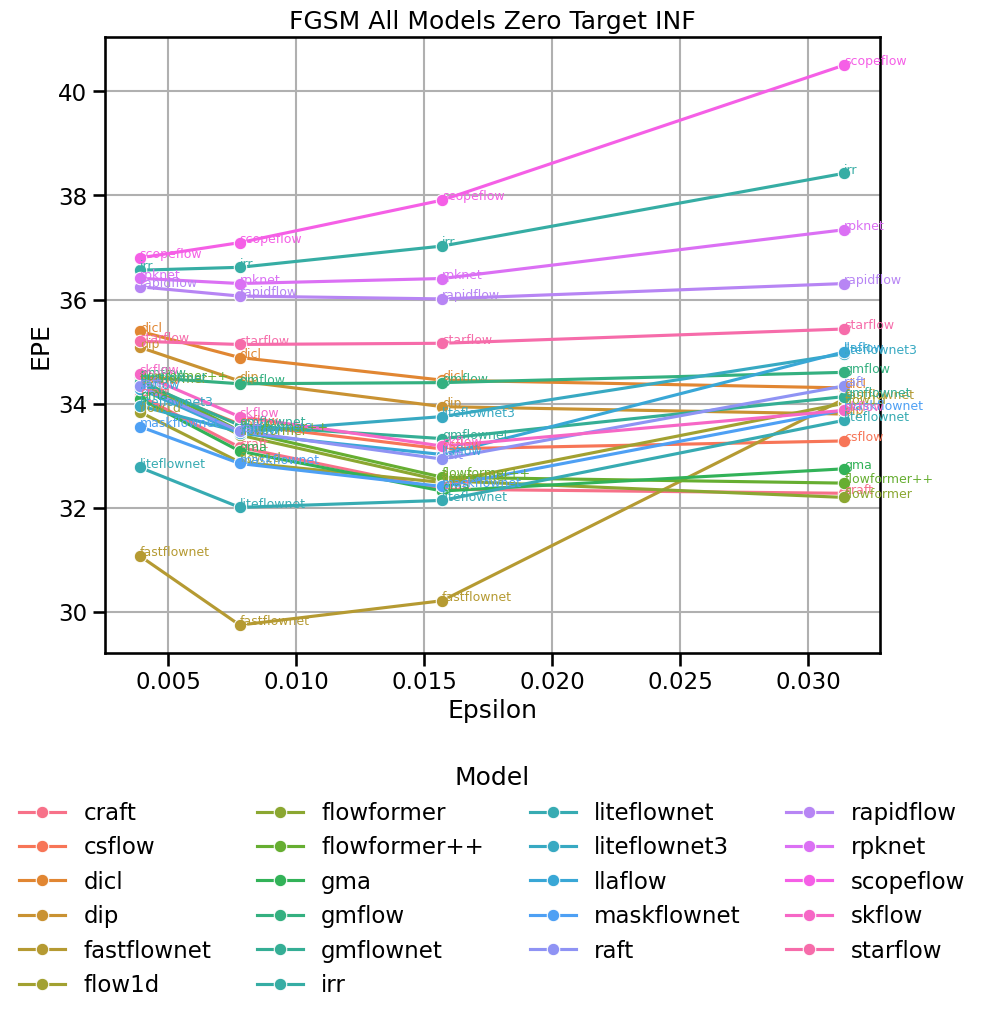

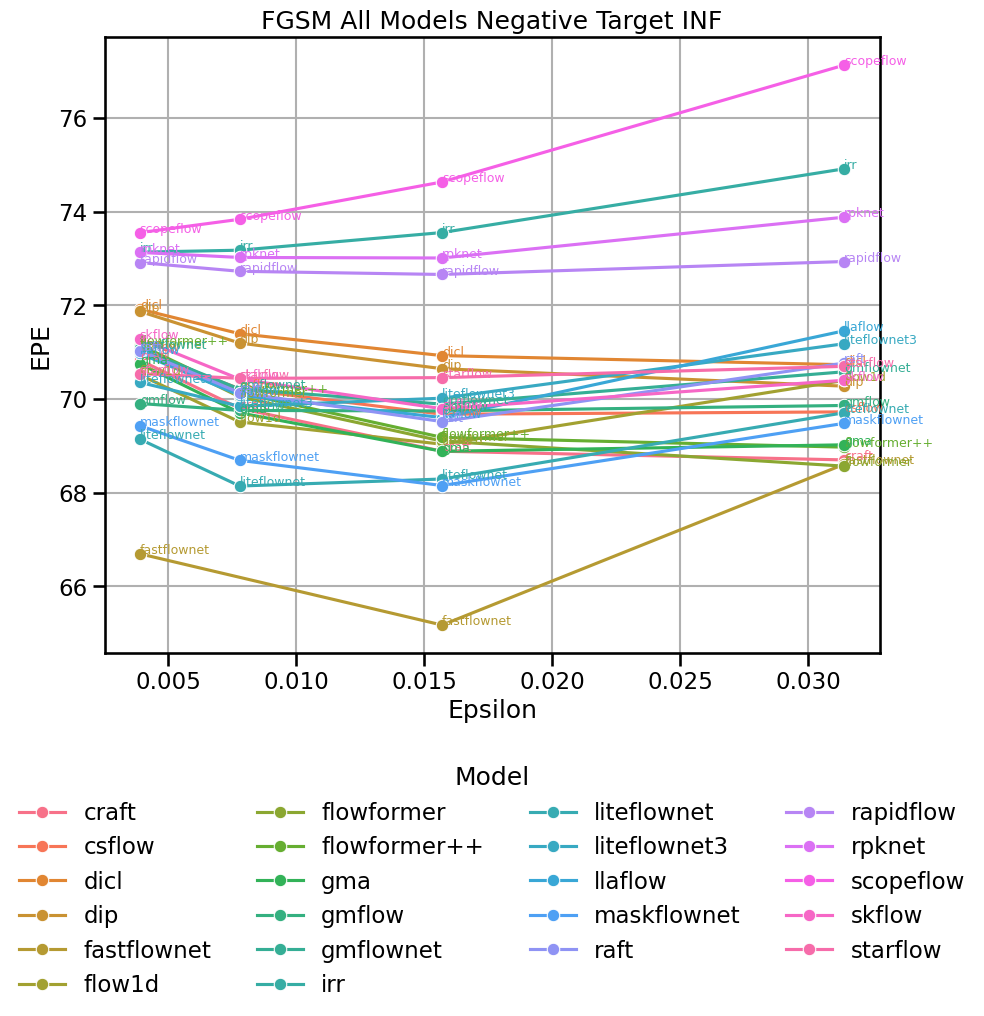

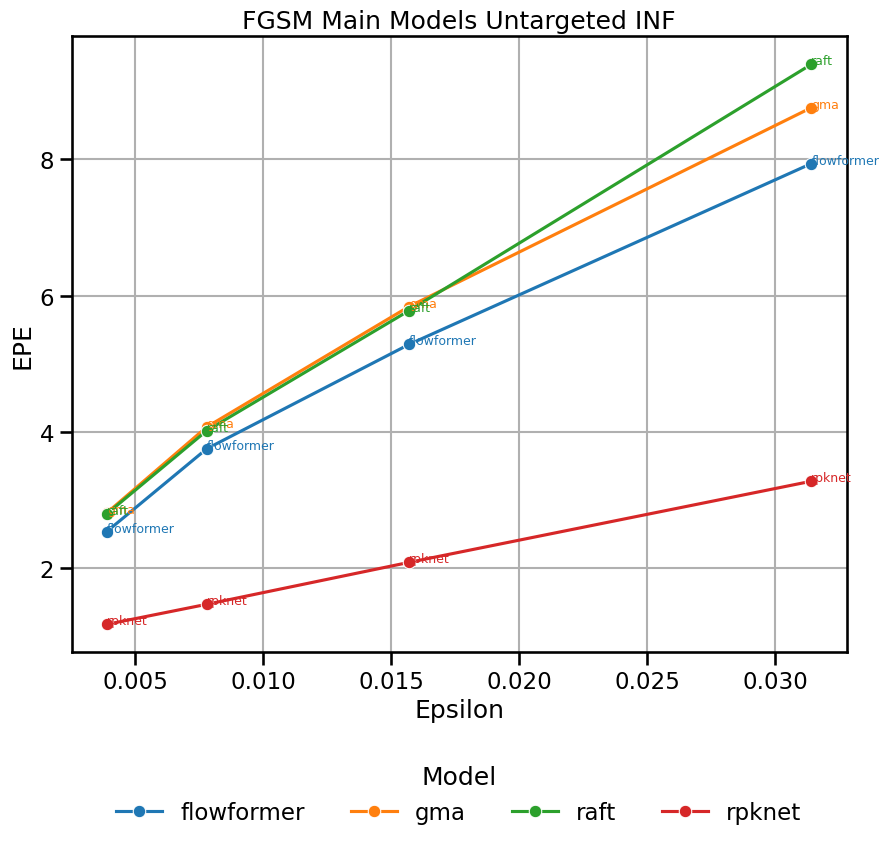

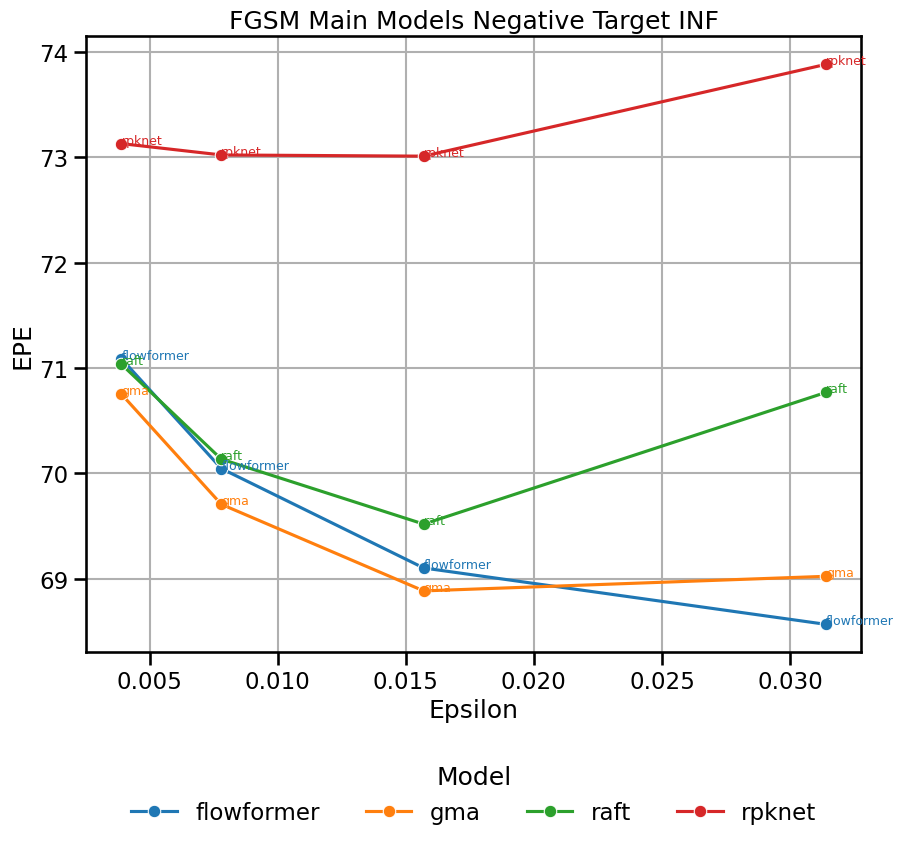

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_line(data, title, filename):
    # Create the plot
    plt.figure(figsize=(10, 8))
    line_plot = sns.lineplot(data=data, x='epsilon', y='epe', hue='model', marker='o')

    # Customize the plot
    plt.xlabel('Epsilon')
    plt.ylabel('EPE')
    plt.grid(True)
    plt.title(title)

    # Add annotations
    # Get colors from the legend
    handles, labels = line_plot.get_legend_handles_labels()
    legend_colors = dict(zip(labels, [handle.get_color() for handle in handles]))

    for model in data['model'].unique():
        model_data = data[data['model'] == model]
        for i in range(model_data.shape[0]):
            plt.text(model_data['epsilon'].iloc[i], model_data['epe'].iloc[i], model, fontsize=9, color=legend_colors[model])

    # Adjust legend
    plt.legend(title='Model', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4, frameon=False)

    # Show the plot
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# Plot for untargeted attack
data_untargeted = df.query("attack == 'fgsm' and norm == 'inf' and targeted == False and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_line(data_untargeted, "FGSM All Models Untargeted INF", 'graphs/FGSM All Models Untargeted INF.png')

# Plot for targeted attack with target zero
data_target_zero = df.query("attack == 'fgsm' and norm == 'inf' and targeted == True and target == 'zero' and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_line(data_target_zero, "FGSM All Models Zero Target INF", 'graphs/FGSM All Models Zero Target INF.png')

# Plot for targeted attack with negative target
data_target_negative = df.query("attack == 'fgsm' and norm == 'inf' and targeted == True and target == 'negative' and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_line(data_target_negative, "FGSM All Models Negative Target INF", 'graphs/FGSM All Models Negative Target INF.png')

specific_models = ['raft', 'pwcnet', 'gma', 'flownet2', 'flowformer', 'rpknet']

# Plot for untargeted attack with specific models
data_specific_models_untargeted = data_untargeted[data_untargeted['model'].isin(specific_models)]
plot_line(data_specific_models_untargeted, "FGSM Main Models Untargeted INF", 'graphs/FGSM Main Models Untargeted INF.png')

# Plot for targeted attack with target zero and specific models
data_specific_models_target_zero = data_target_zero[data_target_zero['model'].isin(specific_models)]
plot_line(data_specific_models_target_zero, "FGSM Main Models Zero Target INF", 'graphs/FGSM Main Models Zero Target INF.png')

# Plot for targeted attack with negative target and specific models
data_specific_models_target_negative = data_target_negative[data_target_negative['model'].isin(specific_models)]
plot_line(data_specific_models_target_negative, "FGSM Main Models Negative Target INF", 'graphs/FGSM Main Models Negative Target INF.png')


#### FGSM ALL + MAIN MODELS TWO NORM

/scratch/ipykernel_488015/3529677400.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=data, x='model', y='epe', ci=None, palette='tab10')
/scratch/ipykernel_488015/3529677400.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=data, x='model', y='epe', ci=None, palette='tab10')


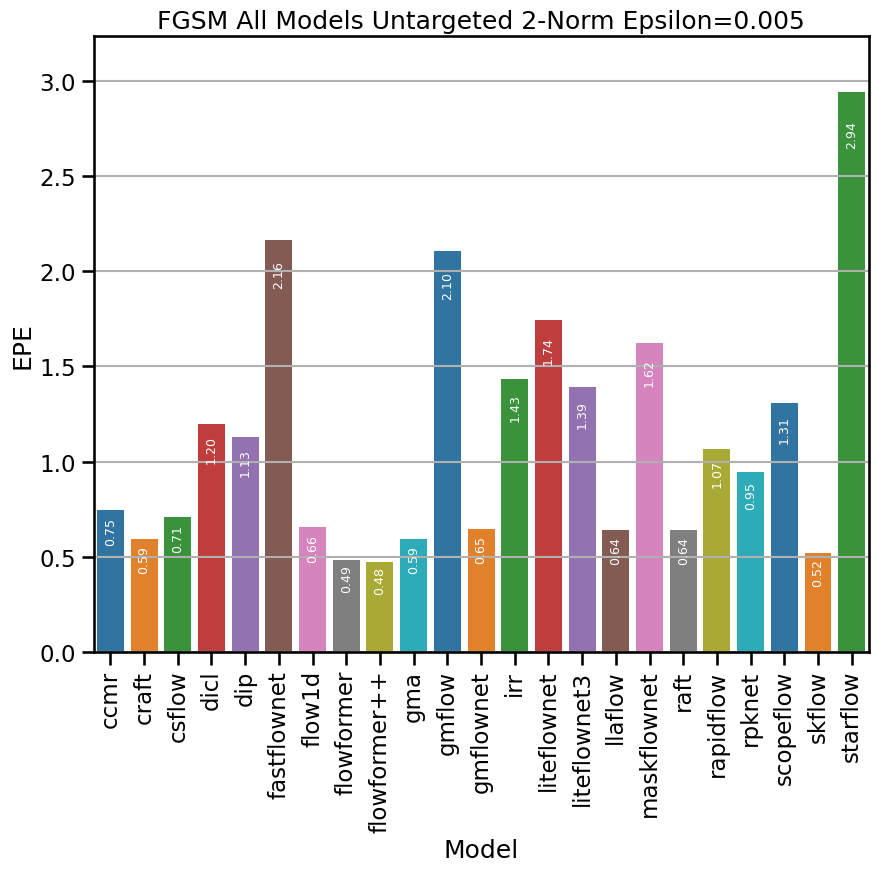

/scratch/ipykernel_488015/3529677400.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=data, x='model', y='epe', ci=None, palette='tab10')
/scratch/ipykernel_488015/3529677400.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=data, x='model', y='epe', ci=None, palette='tab10')


/scratch/ipykernel_488015/3529677400.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=data, x='model', y='epe', ci=None, palette='tab10')
/scratch/ipykernel_488015/3529677400.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=data, x='model', y='epe', ci=None, palette='tab10')


/scratch/ipykernel_488015/3529677400.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=data, x='model', y='epe', ci=None, palette='tab10')
/scratch/ipykernel_488015/3529677400.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=data, x='model', y='epe', ci=None, palette='tab10')


/scratch/ipykernel_488015/3529677400.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=data, x='model', y='epe', ci=None, palette='tab10')
/scratch/ipykernel_488015/3529677400.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=data, x='model', y='epe', ci=None, palette='tab10')


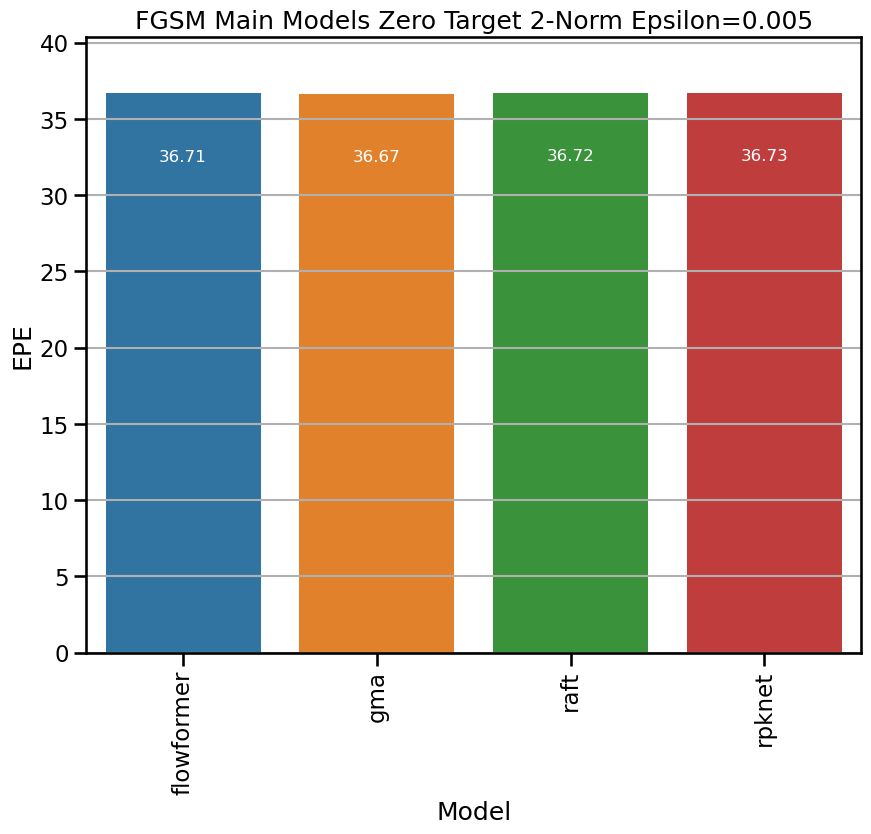

/scratch/ipykernel_488015/3529677400.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=data, x='model', y='epe', ci=None, palette='tab10')
/scratch/ipykernel_488015/3529677400.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=data, x='model', y='epe', ci=None, palette='tab10')


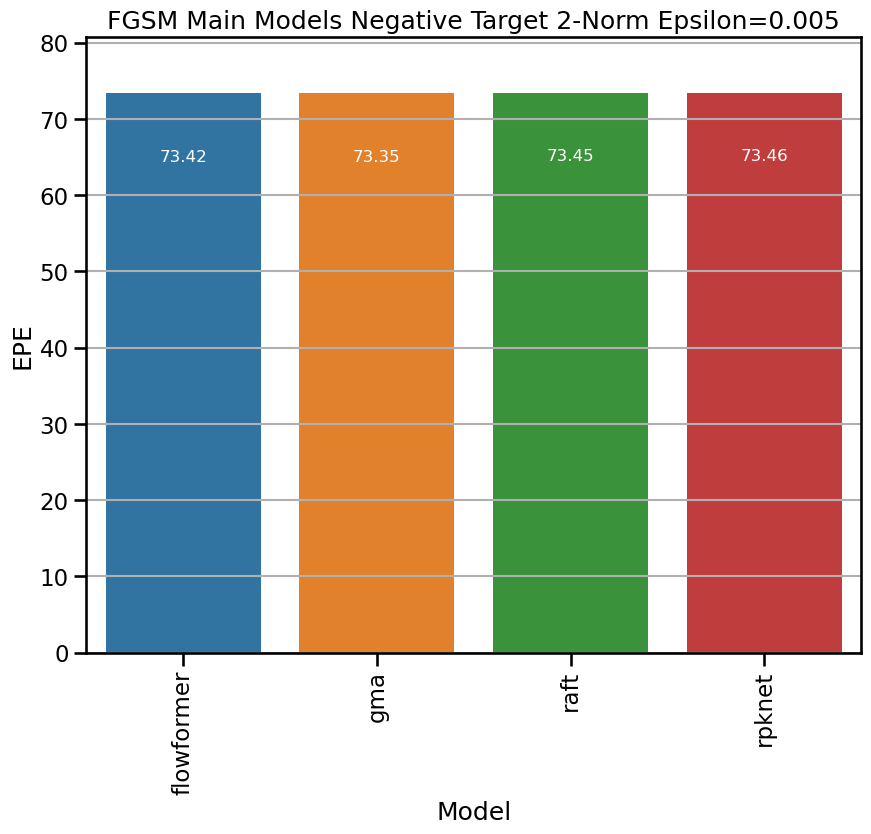

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_data(data, title, filename, specific_models=False):
    # Create the plot
    plt.figure(figsize=(10, 8))
    bar_plot = sns.barplot(data=data, x='model', y='epe', ci=None, palette='tab10')

    # Customize the plot
    plt.xlabel('Model')
    plt.ylabel('EPE')
    plt.title(title)
    plt.grid(True, axis='y')

    # Rotate the x-axis labels to be vertical
    plt.xticks(rotation=90)

    # Annotate each bar with the y value within the bar at the top
    for bar in bar_plot.patches:
        bar_height = bar.get_height()
        if specific_models:
            bar_plot.text(
                bar.get_x() + bar.get_width() / 2,
                bar_height - bar_height * 0.10,  # Adjusted for better alignment
                f'{bar_height:.2f}',
                ha='center',
                va='top',
                rotation=0,  # Horizontal text
                color='white',
                fontsize=12  # Larger font size
            )
        else:
            bar_plot.text(
                bar.get_x() + bar.get_width() / 2,
                bar_height - bar_height * 0.05,
                f'{bar_height:.2f}',
                ha='center',
                va='top',
                rotation=90,  # Vertical text
                color='white',
                fontsize=9
            )

    # Adjust y-axis limit to make sure the annotations fit within the frame
    max_epe = data['epe'].max()
    plt.ylim(0, max_epe * 1.1)

    # Show the plot
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# Plot for untargeted attack
data_untargeted = df.query("attack == 'fgsm' and norm == 'two' and targeted == False and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_data(data_untargeted, "FGSM All Models Untargeted 2-Norm Epsilon=0.005", 'graphs/FGSM All Models Untargeted 2-Norm.png')

# Plot for targeted attack with target zero
data_target_zero = df.query("attack == 'fgsm' and norm == 'two' and targeted == True and target == 'zero' and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_data(data_target_zero, "FGSM All Models Zero Target 2-Norm Epsilon=0.005", 'graphs/FGSM All Models Zero Target 2-Norm.png')

# Plot for targeted attack with negative target
data_target_negative = df.query("attack == 'fgsm' and norm == 'two' and targeted == True and target == 'negative' and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_data(data_target_negative, "FGSM All Models Negative Target 2-Norm Epsilon=0.005", 'graphs/FGSM All Models Negative Target 2-Norm.png')

specific_models = ['raft', 'pwcnet', 'gma', 'flownet2', 'flowformer', 'rpknet']

# Plot for untargeted attack with specific models
data_specific_models_untargeted = data_untargeted[data_untargeted['model'].isin(specific_models)]
plot_data(data_specific_models_untargeted, "FGSM Main Models Untargeted 2-Norm Epsilon=0.005", 'graphs/FGSM Main Models Untargeted 2-Norm.png', specific_models=True)

# Plot for targeted attack with target zero and specific models
data_specific_models_target_zero = data_target_zero[data_target_zero['model'].isin(specific_models)]
plot_data(data_specific_models_target_zero, "FGSM Main Models Zero Target 2-Norm Epsilon=0.005", 'graphs/FGSM Main Models Zero Target 2-Norm.png', specific_models=True)

# Plot for targeted attack with negative target and specific models
data_specific_models_target_negative = data_target_negative[data_target_negative['model'].isin(specific_models)]
plot_data(data_specific_models_target_negative, "FGSM Main Models Negative Target 2-Norm Epsilon=0.005", 'graphs/FGSM Main Models Negative Target 2-Norm.png', specific_models=True)


#### BIM ALL Models INF + TWO



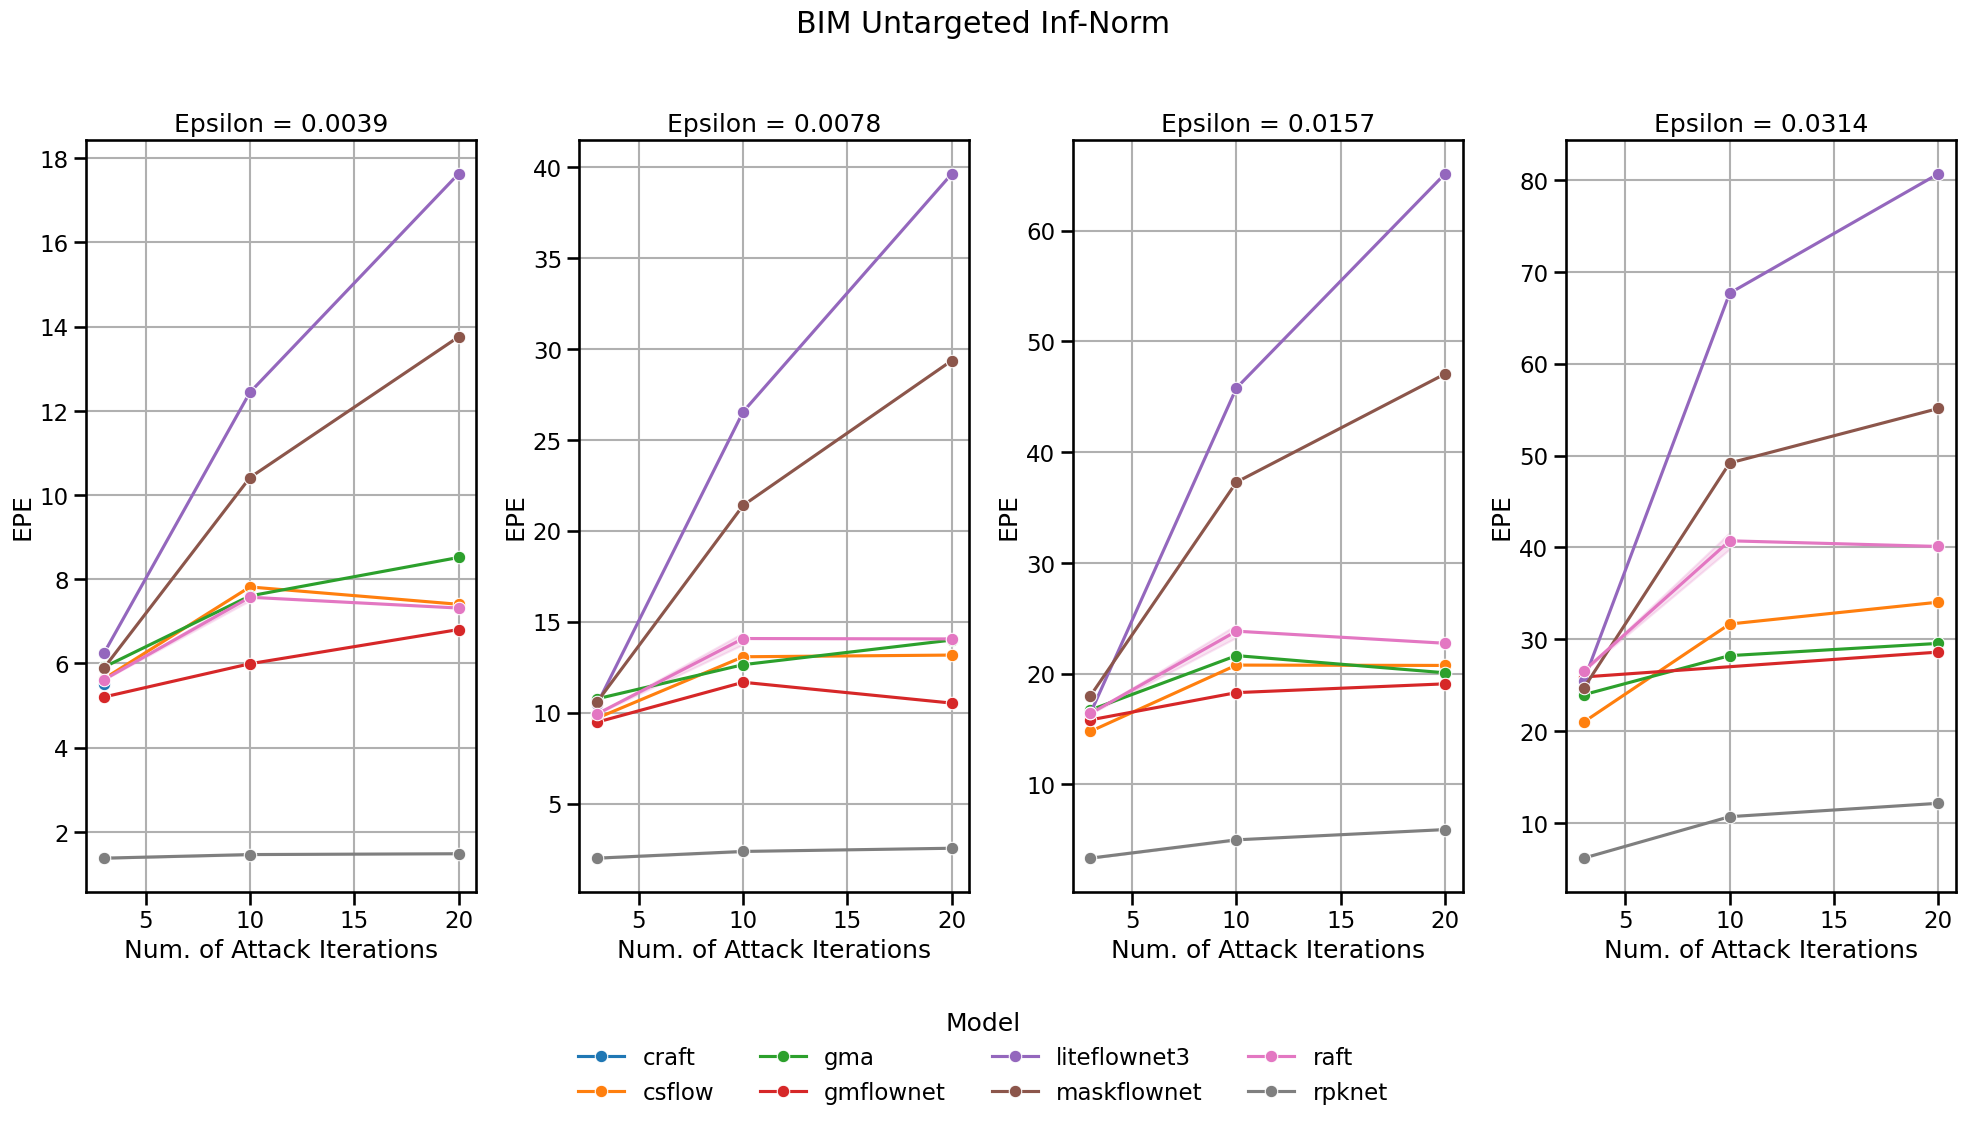

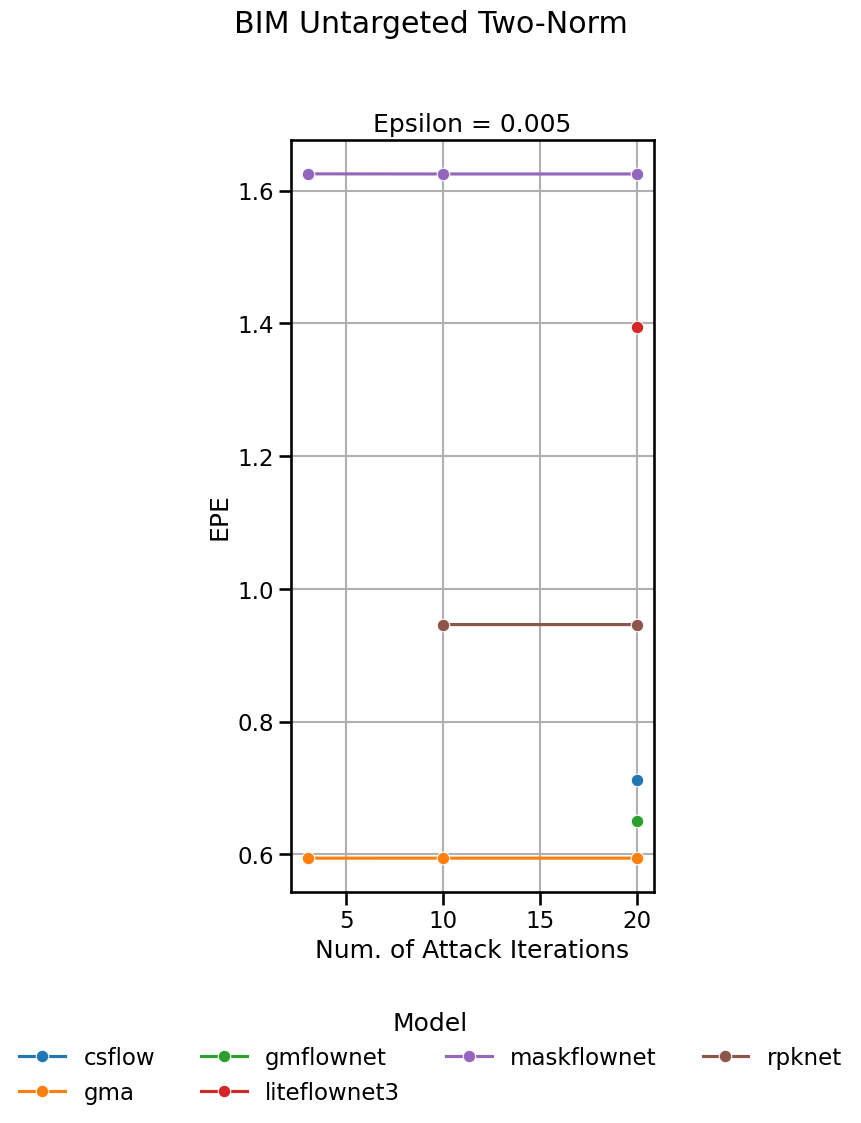

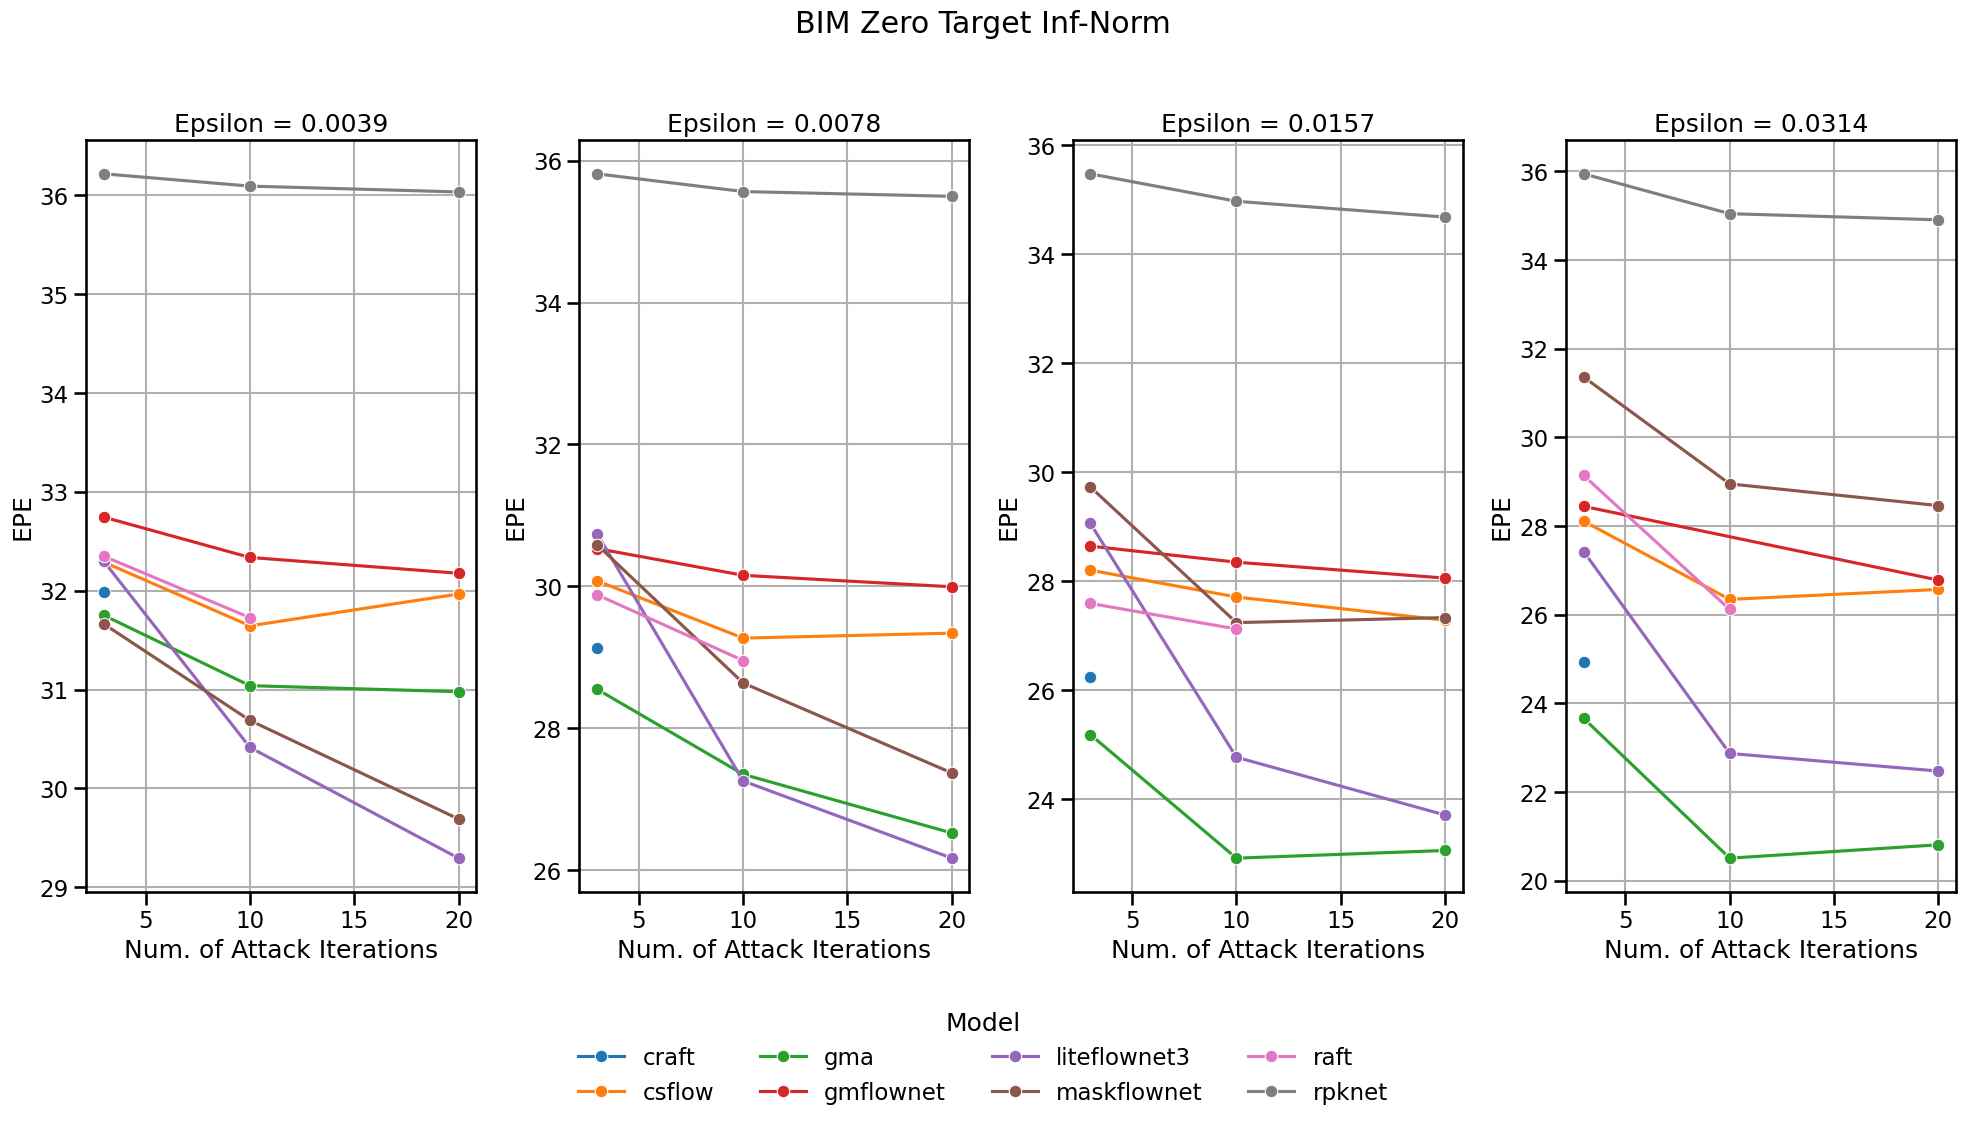

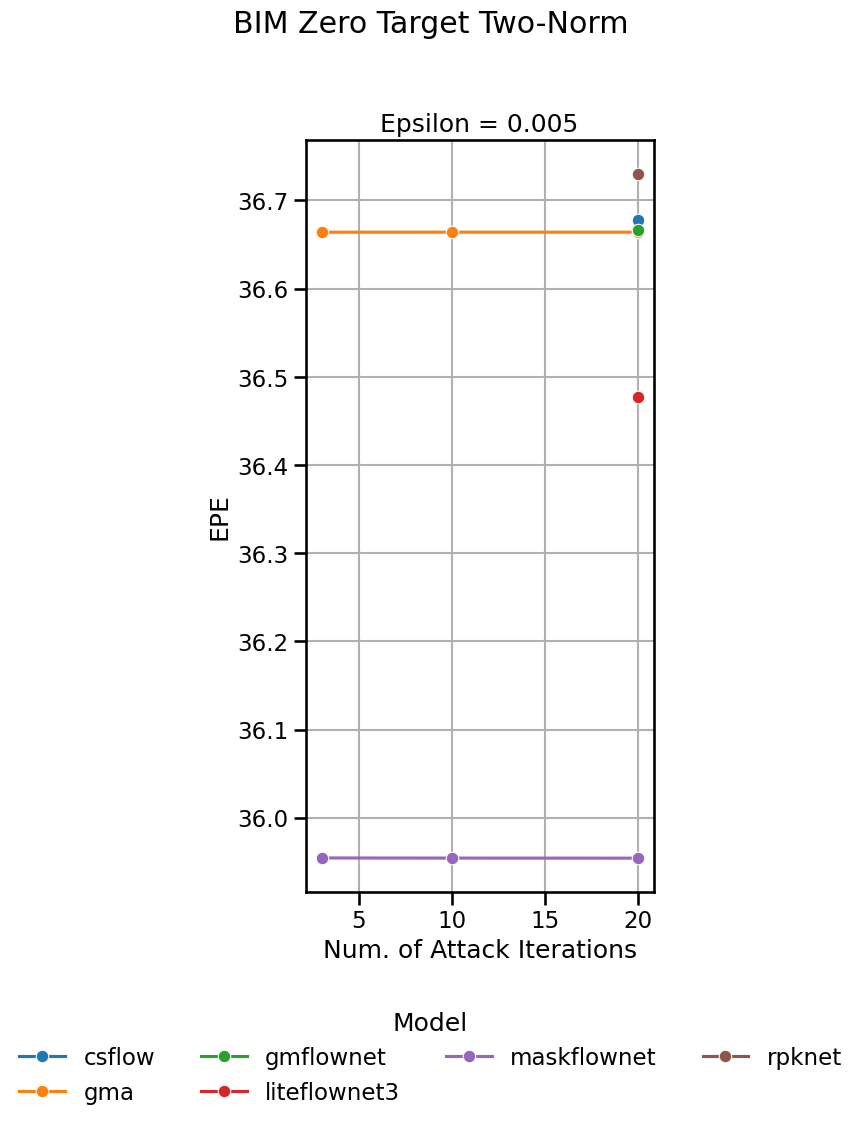

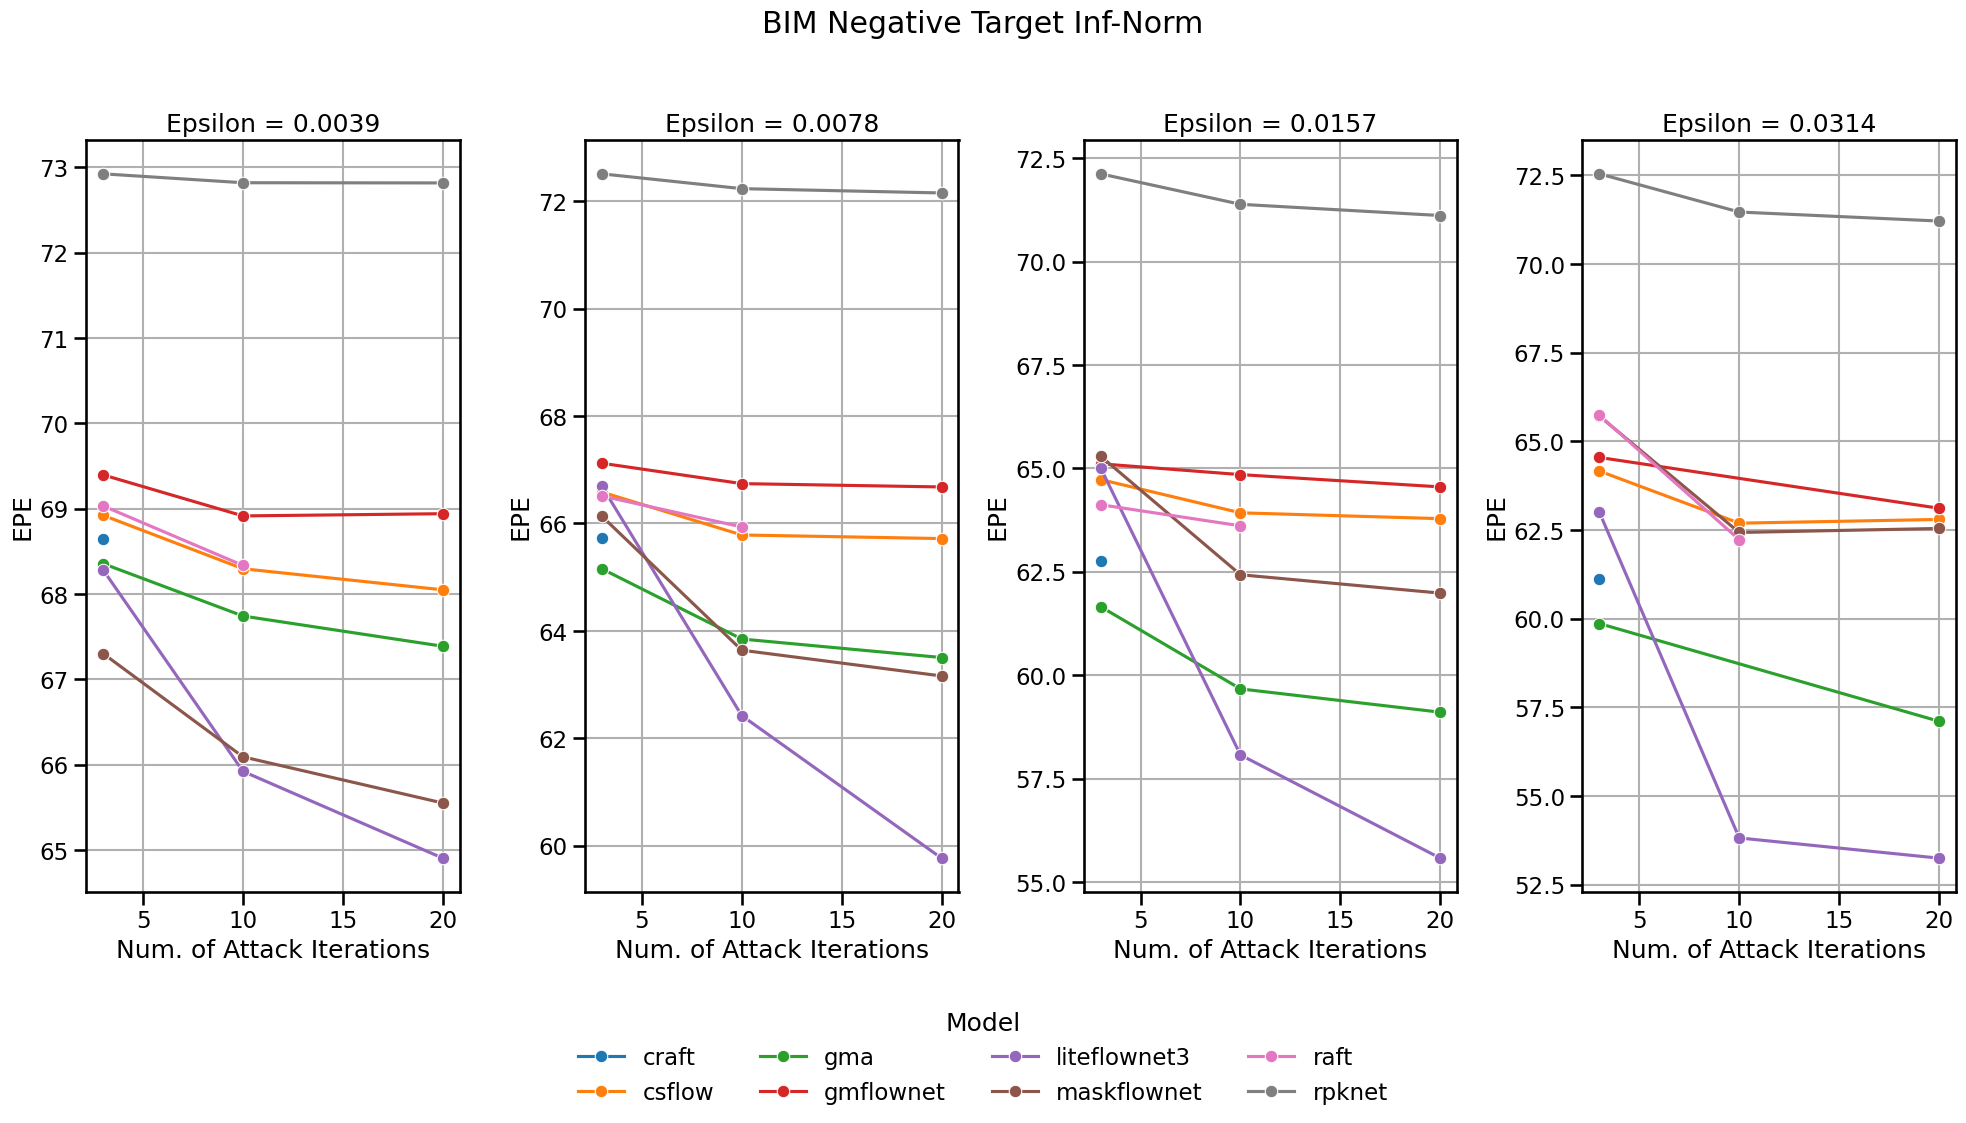

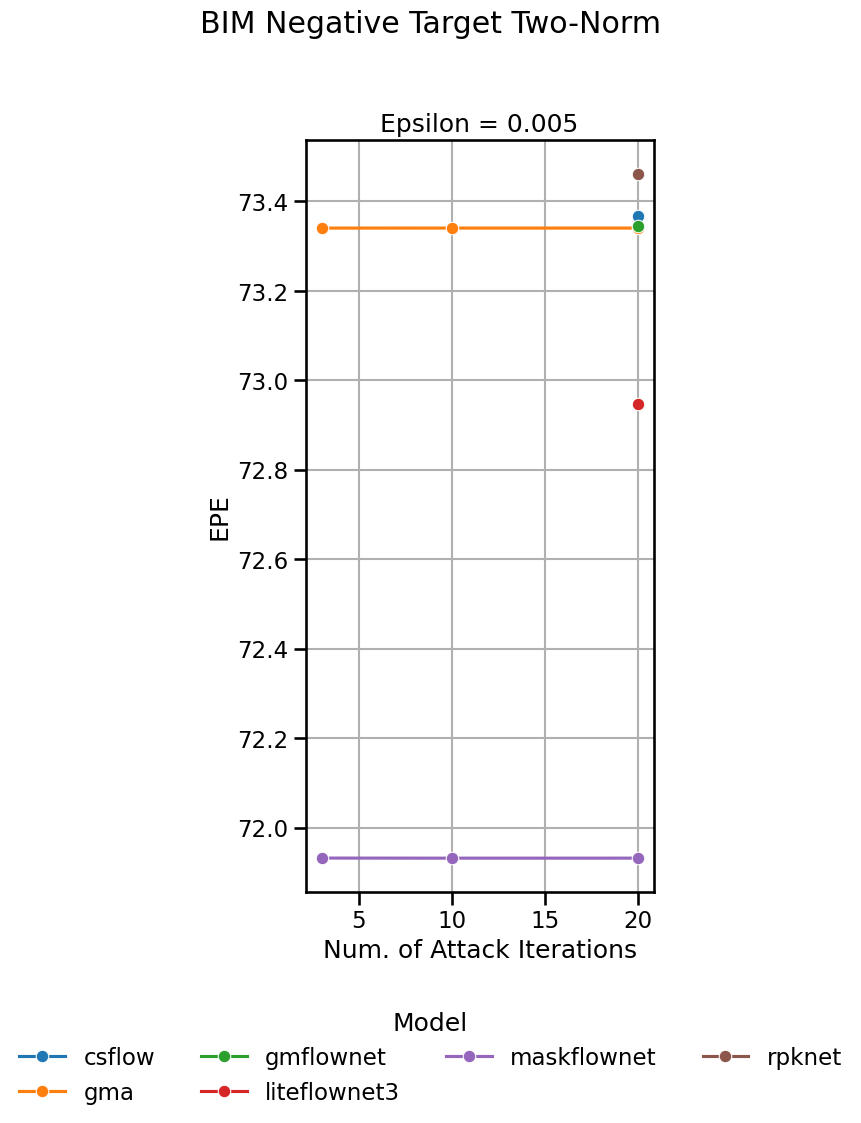

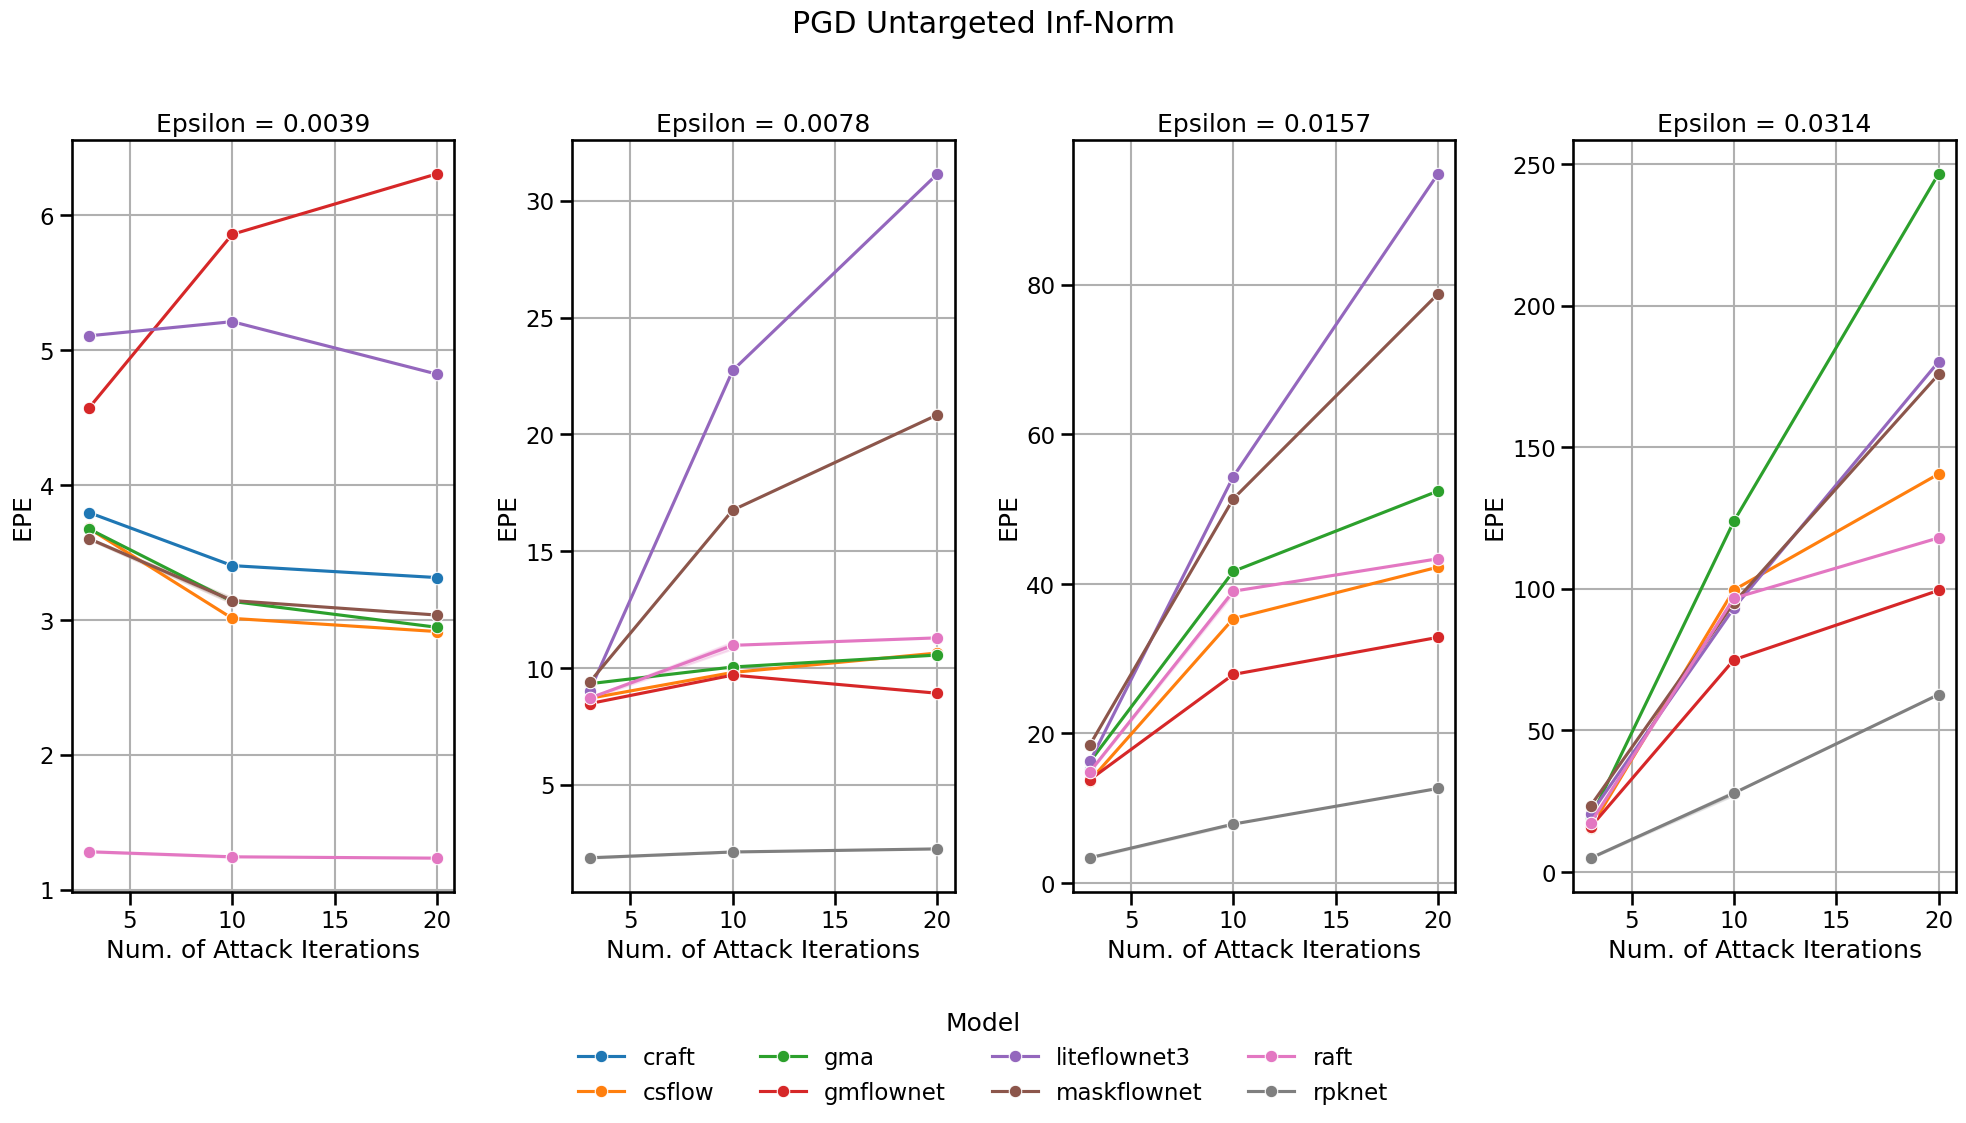

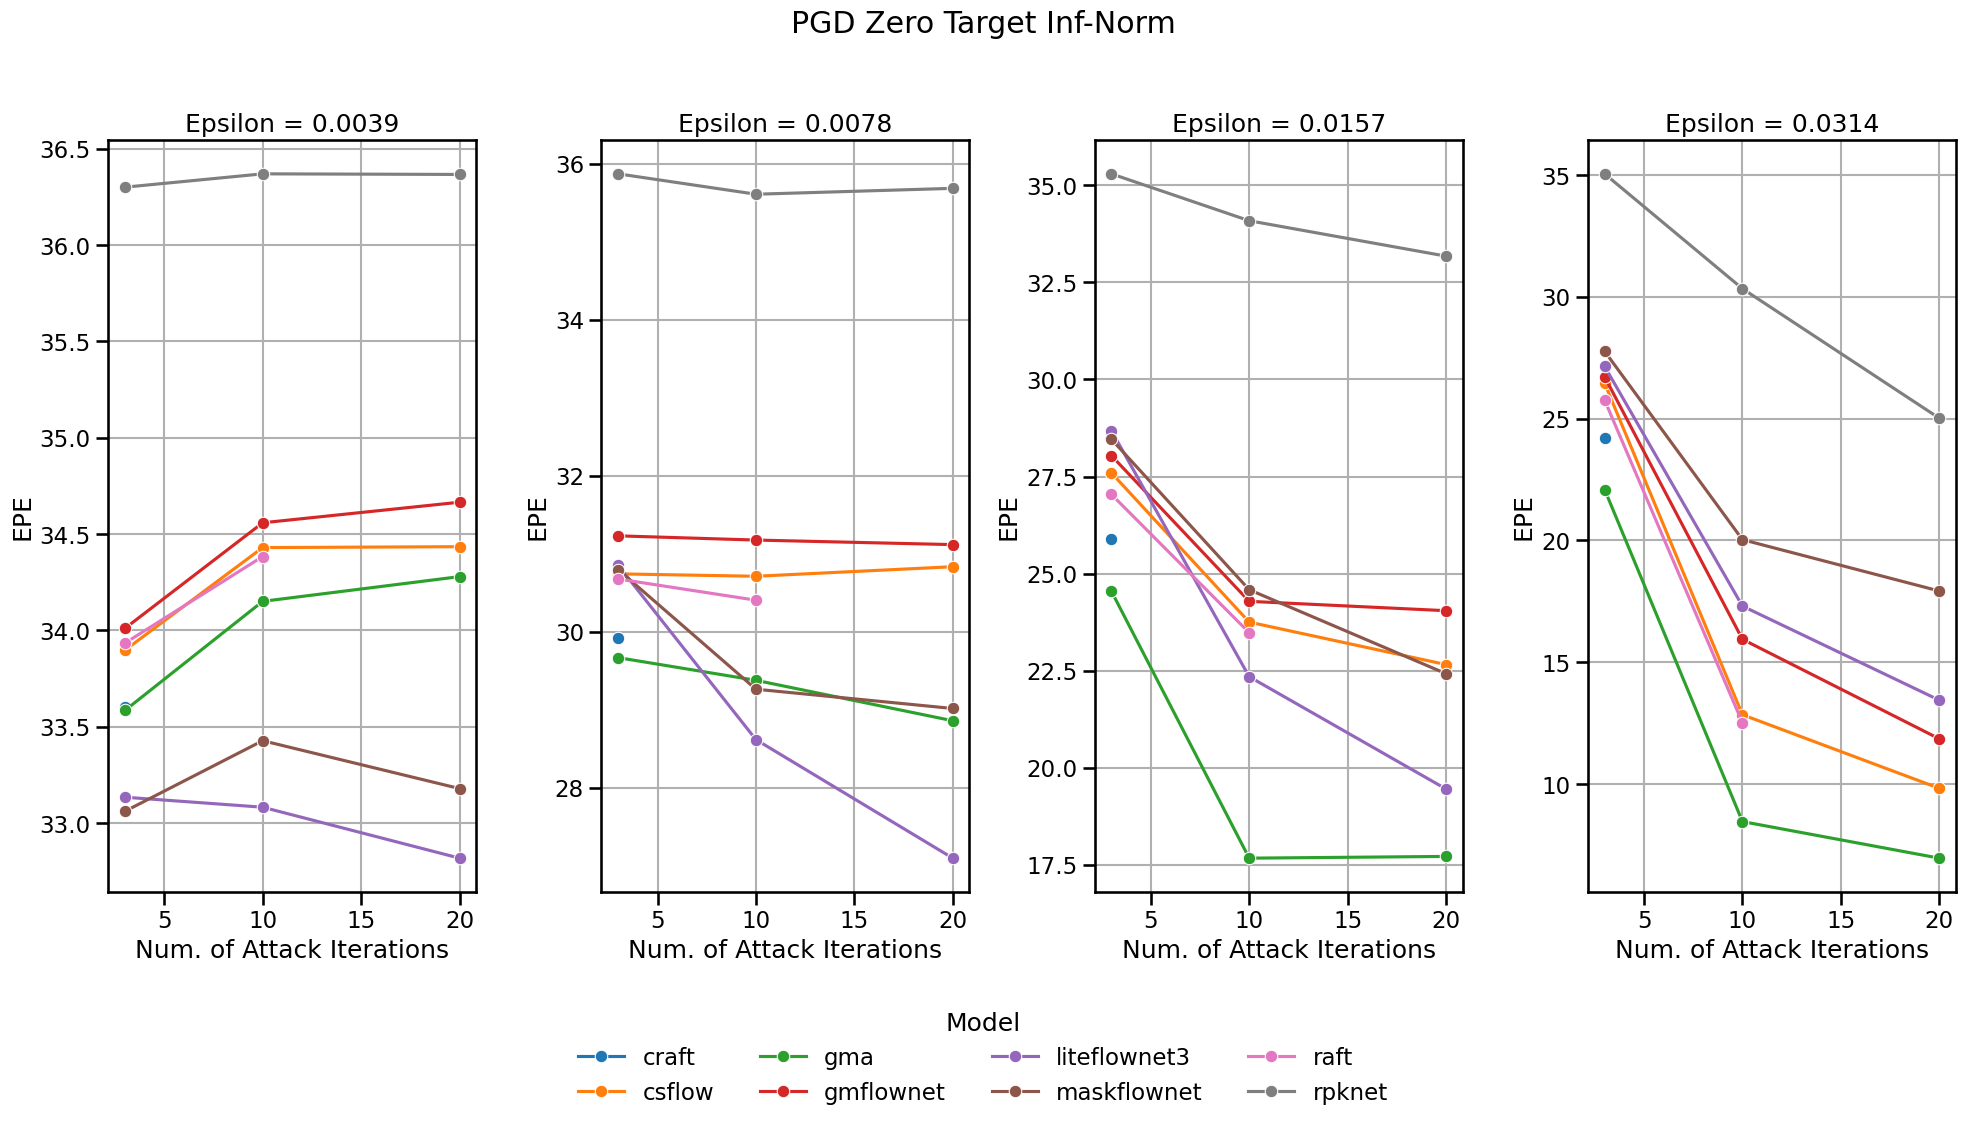

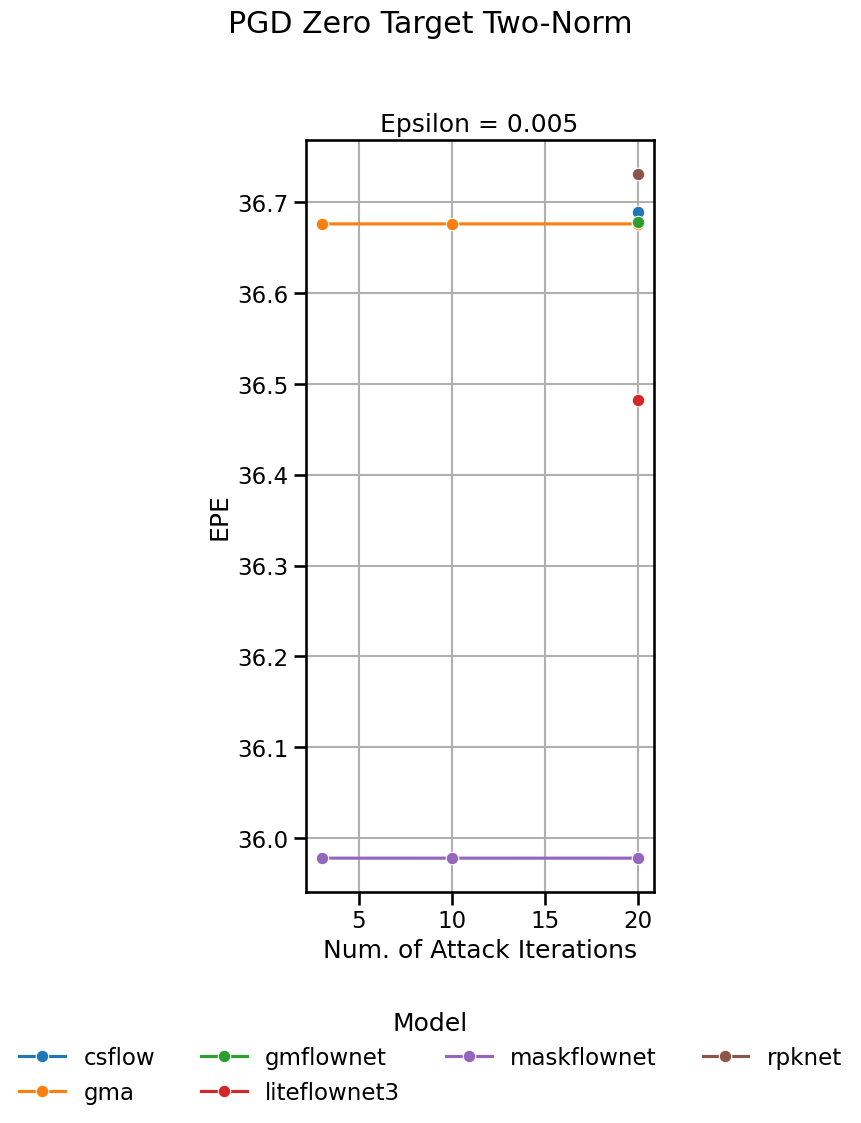

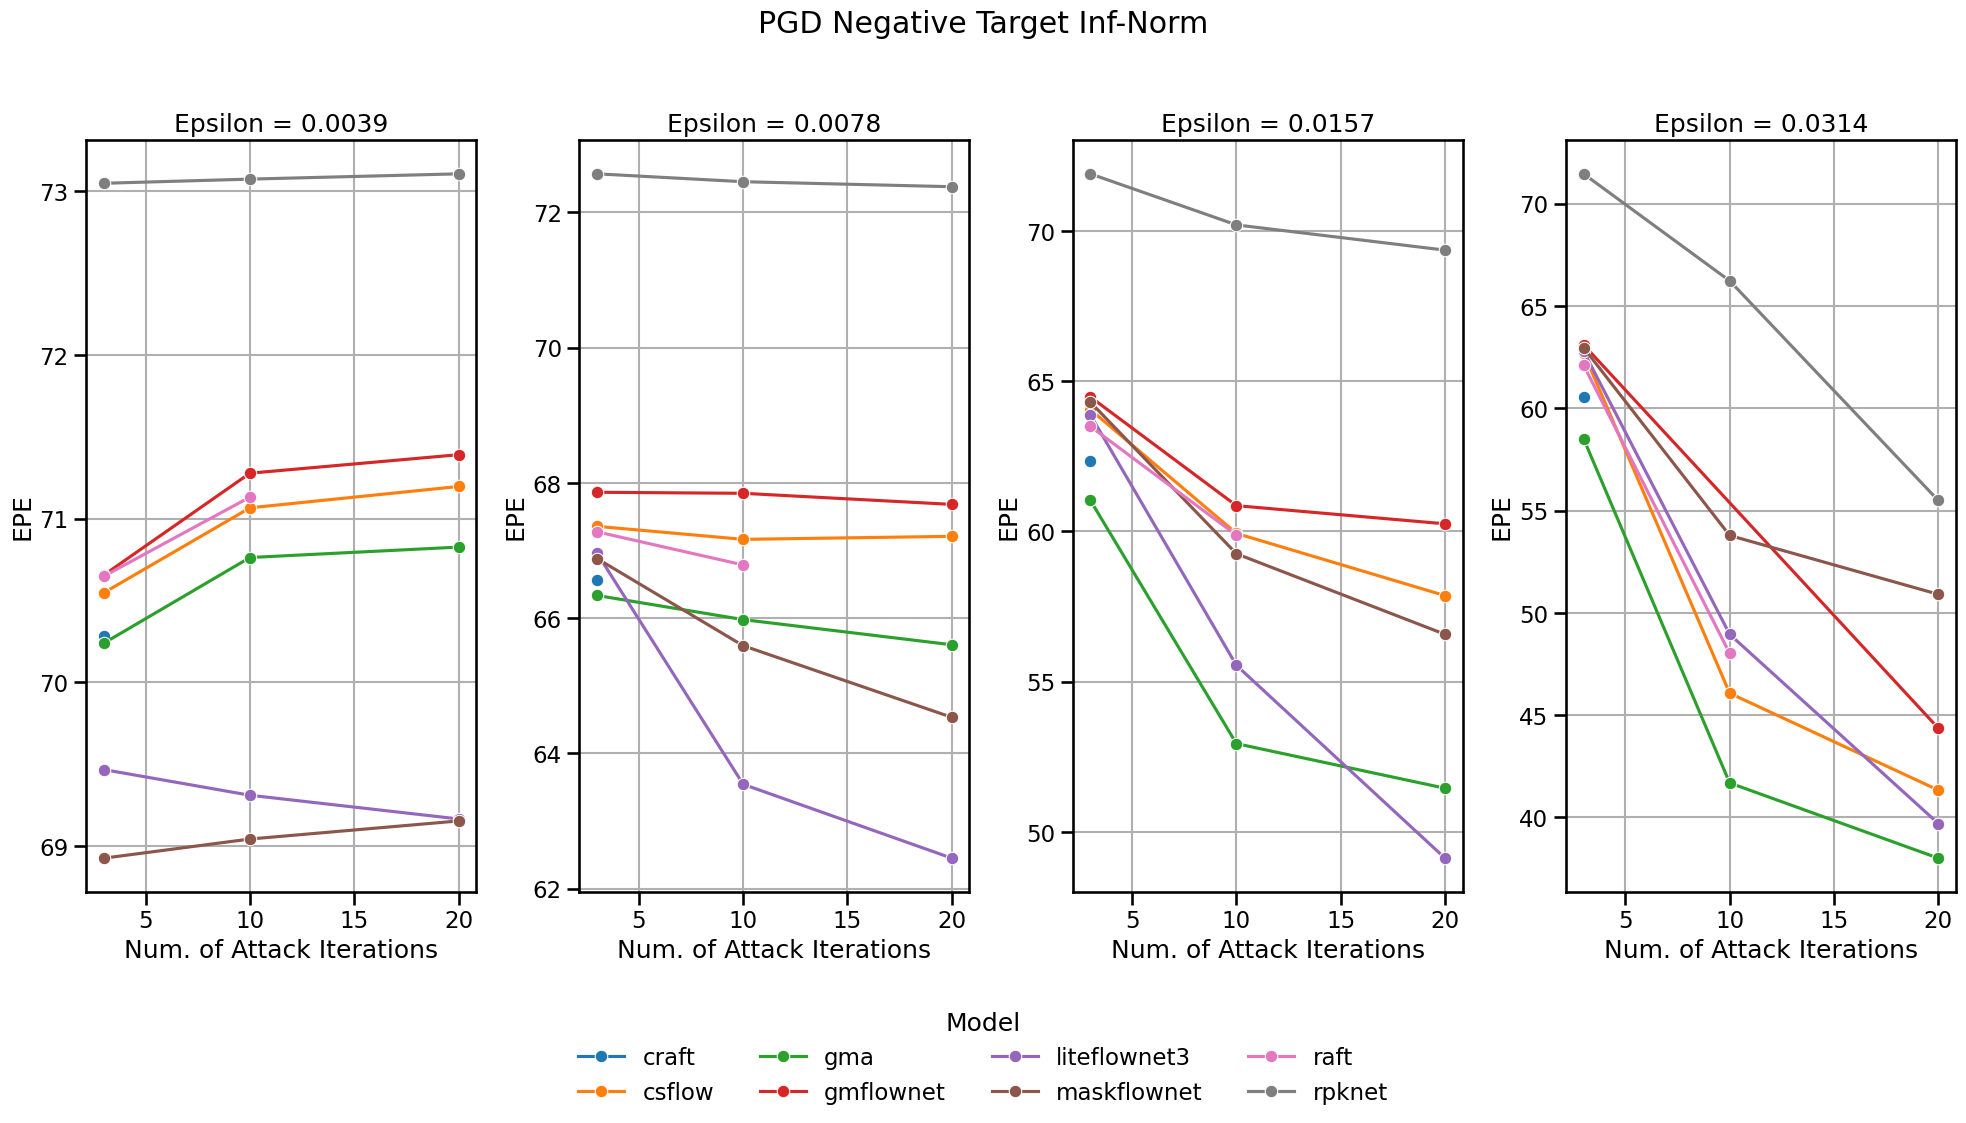

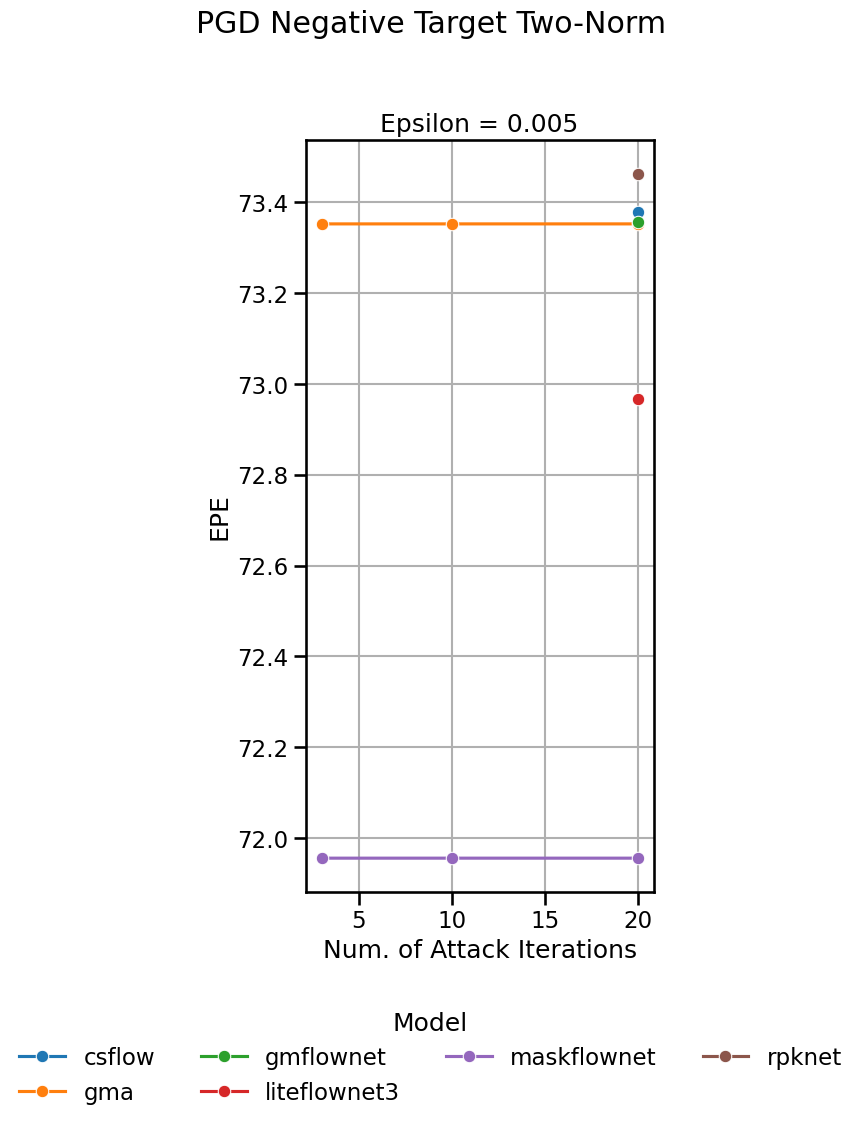

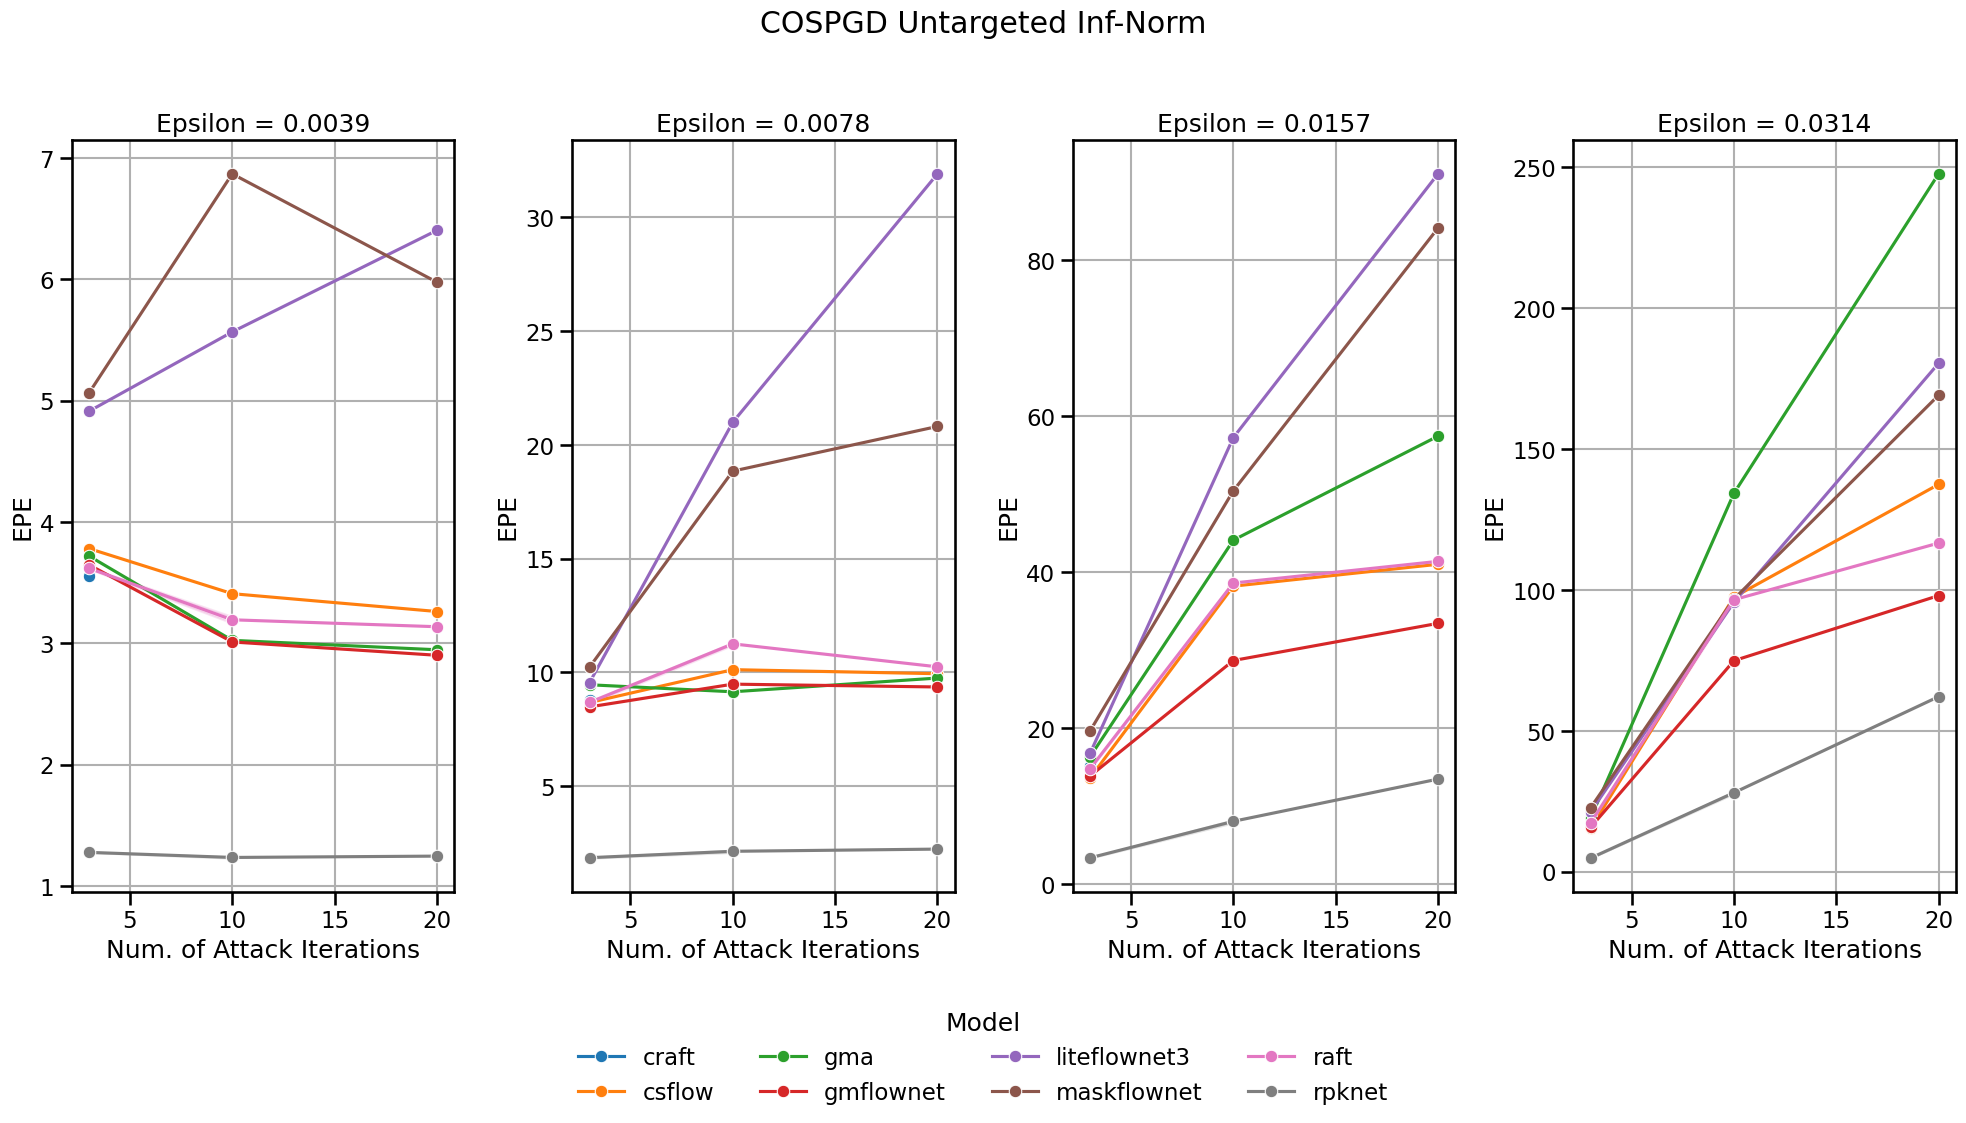

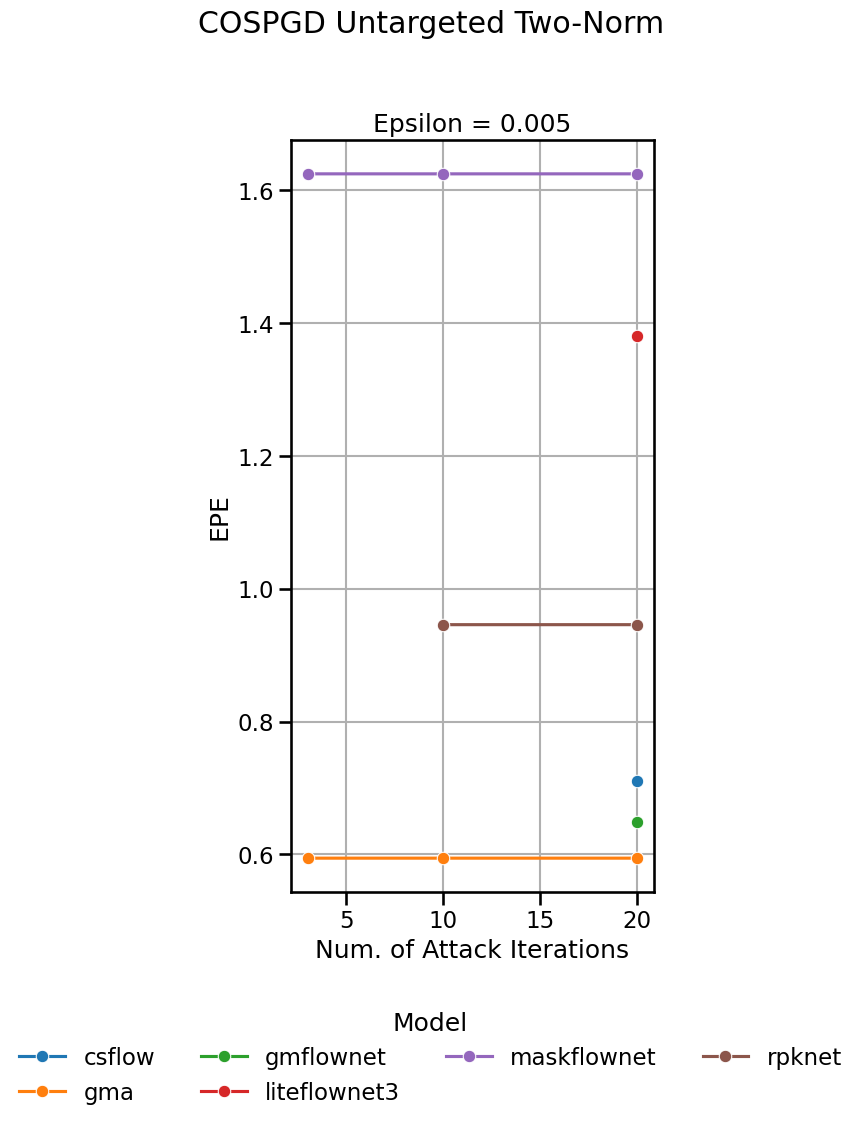

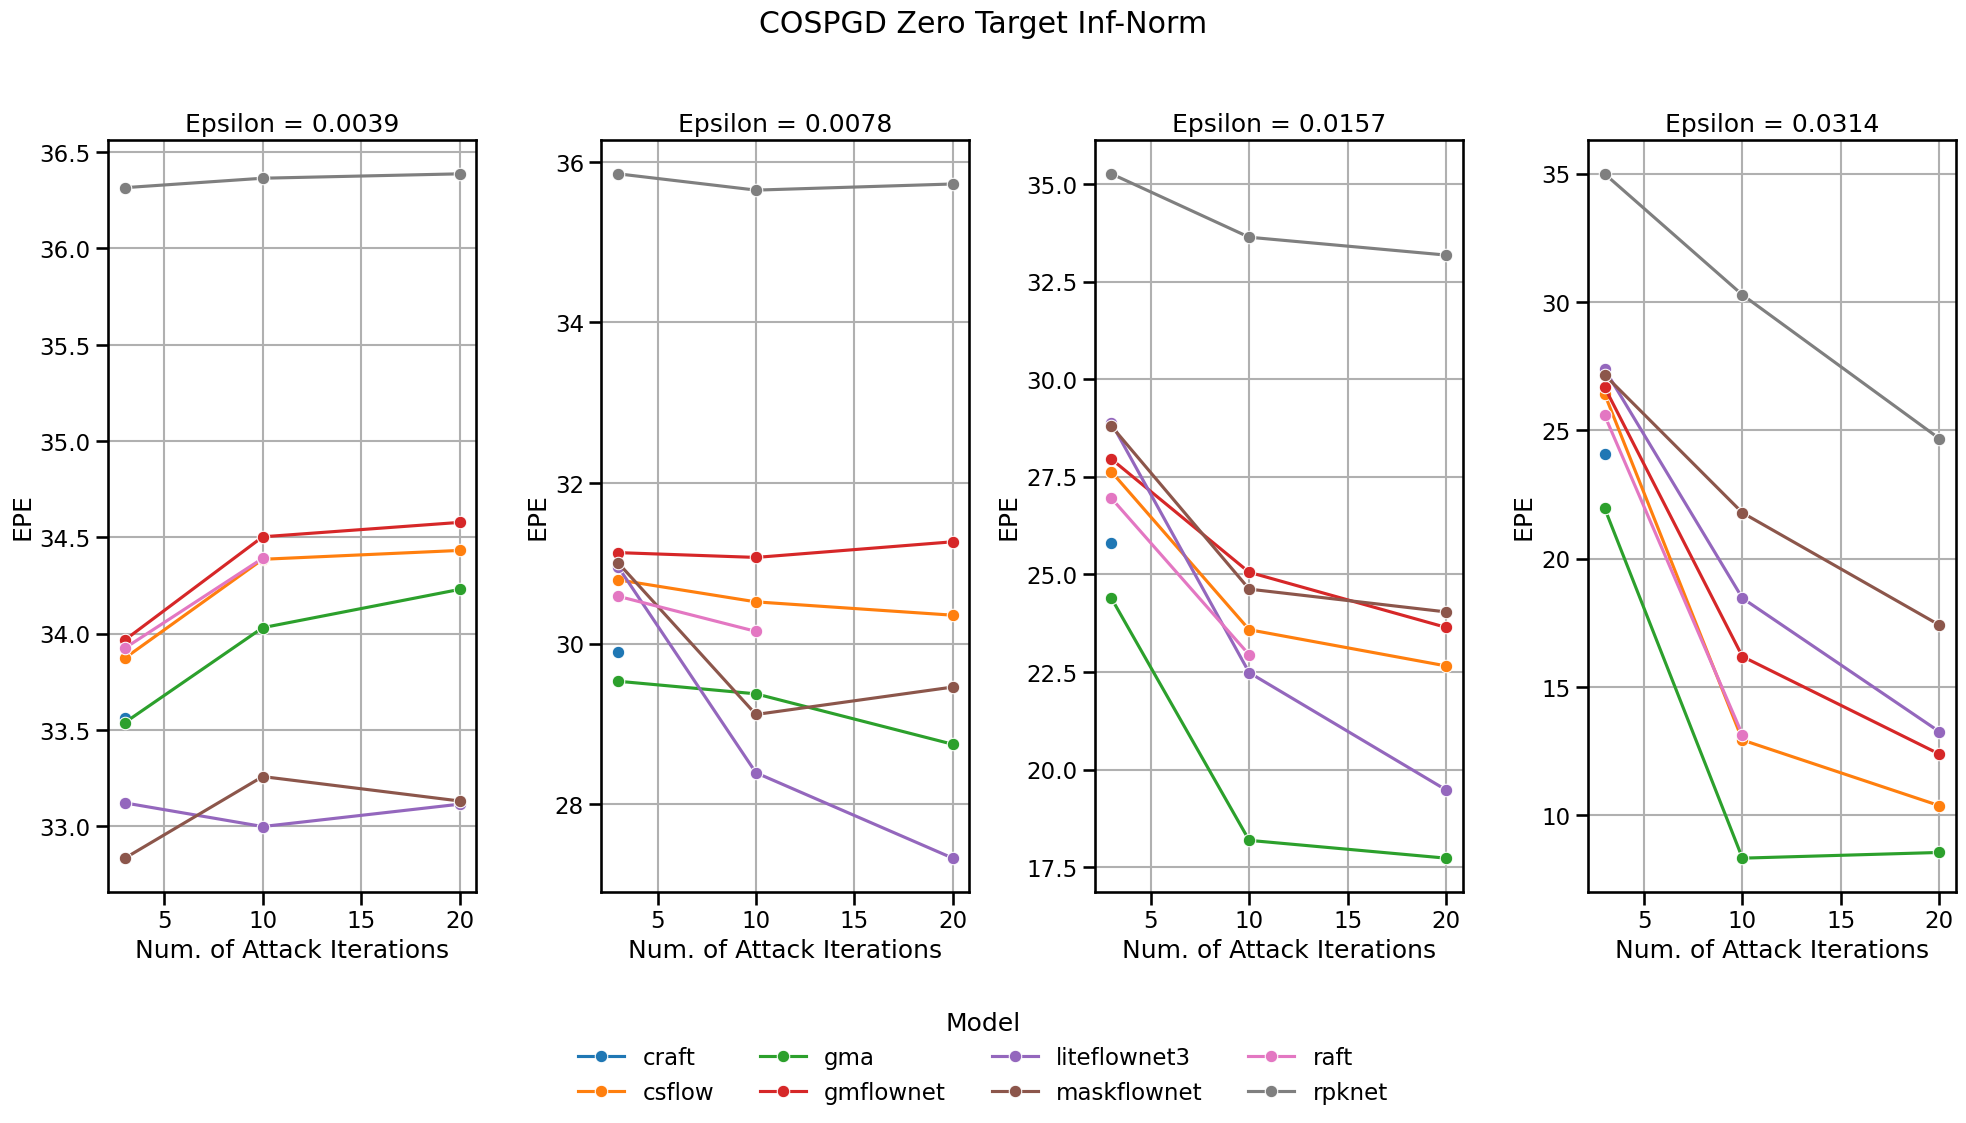

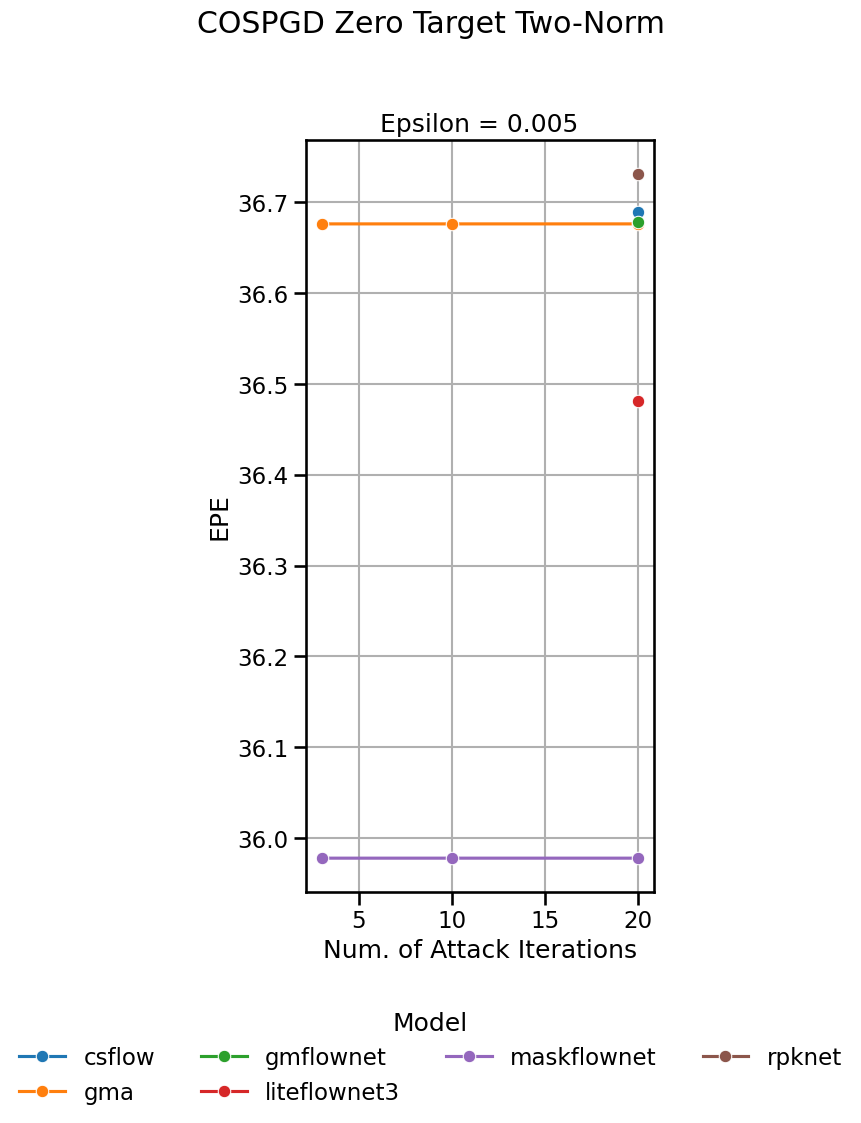

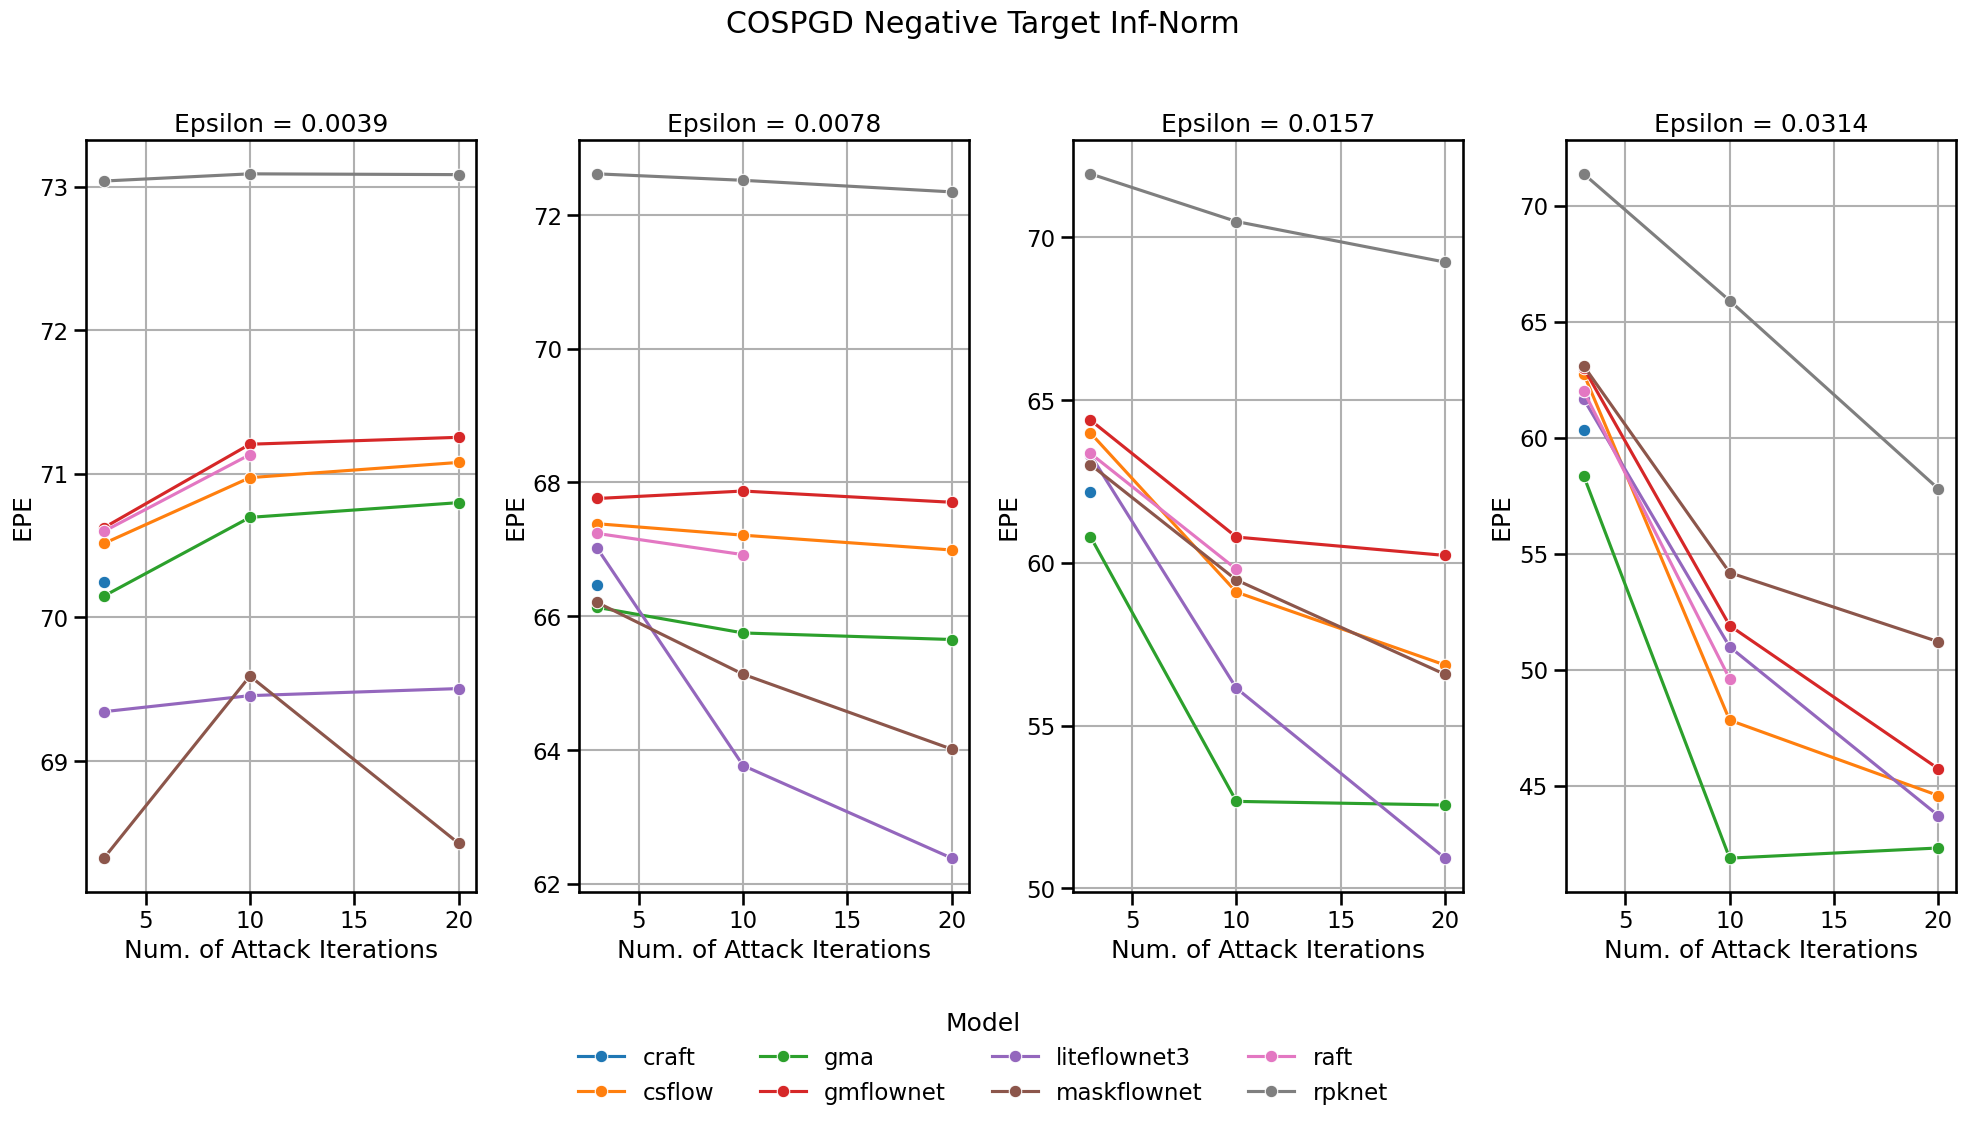

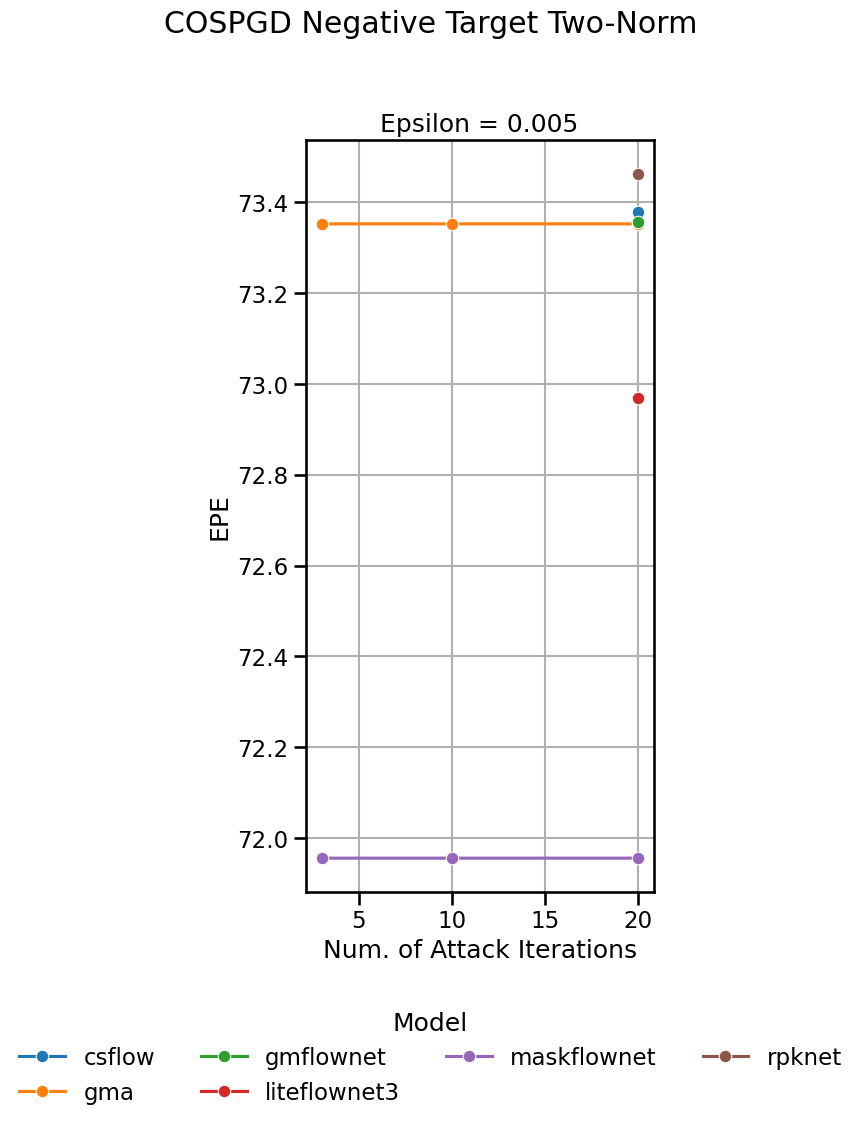

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_bim(data, title, filename, epsilon_values):
    num_epsilon = len(epsilon_values)
    fig, axes = plt.subplots(1, num_epsilon, figsize=(5 * num_epsilon, 10))
    fig.suptitle(title)

    if num_epsilon == 1:
        axes = [axes]

    for ax, epsilon in zip(axes, epsilon_values):
        # Create the plot for each epsilon
        sns.lineplot(data=data.query(f"epsilon == {epsilon}"), x='iterations', y='epe', hue='model', marker='o', ax=ax)
        ax.set_title(f'Epsilon = {epsilon}')
        ax.set_xlabel('Num. of Attack Iterations')
        ax.set_ylabel('EPE')
        ax.grid(True)

    # Remove individual legends by setting legend to False in sns.lineplot
    for ax in axes:
        ax.legend().remove()

    # Adjust the legend position and add it to the figure
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.001), ncol=4, frameon=False, title='Model')

    # Show the plot
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title and legend
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# Plot for untargeted attack
data_untargeted_inf = df.query("attack == 'bim' and norm == 'inf' and targeted == False and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_bim(data_untargeted_inf, 'BIM Untargeted Inf-Norm', 'graphs/BIM Untargeted Inf Norm.png', [0.0039, 0.0078, 0.0157, 0.0314])

data_untargeted_two = df.query("attack == 'bim' and norm == 'two' and targeted == False and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_bim(data_untargeted_two, 'BIM Untargeted Two-Norm', 'graphs/BIM Untargeted Two Norm.png', [0.005])

# Plot for targeted attack with target zero
data_target_zero_inf = df.query("attack == 'bim' and norm == 'inf' and targeted == True and target == 'zero' and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_bim(data_target_zero_inf, 'BIM Zero Target Inf-Norm', 'graphs/BIM Zero Target Inf-Norm.png', [0.0039, 0.0078, 0.0157, 0.0314])

data_target_zero_two = df.query("attack == 'bim' and norm == 'two' and targeted == True and target == 'zero' and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_bim(data_target_zero_two, 'BIM Zero Target Two-Norm', 'graphs/BIM Zero Target Two-Norm.png', [0.005])

# Plot for targeted attack with negative target
data_target_negative_inf = df.query("attack == 'bim' and norm == 'inf' and targeted == True and target == 'negative' and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_bim(data_target_negative_inf, 'BIM Negative Target Inf-Norm', 'graphs/BIM Negative Target Inf-Norm.png', [0.0039, 0.0078, 0.0157, 0.0314])

data_target_negative_two = df.query("attack == 'bim' and norm == 'two' and targeted == True and target == 'negative' and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_bim(data_target_negative_two, 'BIM Negative Target Two-Norm', 'graphs/BIM Negative Target Two-Norm.png', [0.005])



# Plot for untargeted attack
data_untargeted_inf = df.query("attack == 'pgd' and norm == 'inf' and targeted == False and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_bim(data_untargeted_inf, 'PGD Untargeted Inf-Norm', 'graphs/PGD Untargeted Inf Norm.png', [0.0039, 0.0078, 0.0157, 0.0314])

data_untargeted_two = df.query("attack == 'pgd' and norm == 'two' and targeted == False and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_bim(data_untargeted_two, 'PGD Untargeted Two-Norm', 'graphs/PGD Untargeted Two Norm.png', [0.005])

# Plot for targeted attack with target zero
data_target_zero_inf = df.query("attack == 'pgd' and norm == 'inf' and targeted == True and target == 'zero' and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_bim(data_target_zero_inf, 'PGD Zero Target Inf-Norm', 'graphs/PGD Zero Target Inf-Norm.png', [0.0039, 0.0078, 0.0157, 0.0314])

data_target_zero_two = df.query("attack == 'pgd' and norm == 'two' and targeted == True and target == 'zero' and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_bim(data_target_zero_two, 'PGD Zero Target Two-Norm', 'graphs/PGD Zero Target Two-Norm.png', [0.005])

# Plot for targeted attack with negative target
data_target_negative_inf = df.query("attack == 'pgd' and norm == 'inf' and targeted == True and target == 'negative' and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_bim(data_target_negative_inf, 'PGD Negative Target Inf-Norm', 'graphs/PGD Negative Target Inf-Norm.png', [0.0039, 0.0078, 0.0157, 0.0314])

data_target_negative_two = df.query("attack == 'pgd' and norm == 'two' and targeted == True and target == 'negative' and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_bim(data_target_negative_two, 'PGD Negative Target Two-Norm', 'graphs/PGD Negative Target Two-Norm.png', [0.005])






# Plot for untargeted attack
data_untargeted_inf = df.query("attack == 'cospgd' and norm == 'inf' and targeted == False and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_bim(data_untargeted_inf, 'COSPGD Untargeted Inf-Norm', 'graphs/COSPGD Untargeted Inf Norm.png', [0.0039, 0.0078, 0.0157, 0.0314])

data_untargeted_two = df.query("attack == 'cospgd' and norm == 'two' and targeted == False and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_bim(data_untargeted_two, 'COSPGD Untargeted Two-Norm', 'graphs/COSPGD Untargeted Two Norm.png', [0.005])

# Plot for targeted attack with target zero
data_target_zero_inf = df.query("attack == 'cospgd' and norm == 'inf' and targeted == True and target == 'zero' and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_bim(data_target_zero_inf, 'COSPGD Zero Target Inf-Norm', 'graphs/COSPGD Zero Target Inf-Norm.png', [0.0039, 0.0078, 0.0157, 0.0314])

data_target_zero_two = df.query("attack == 'cospgd' and norm == 'two' and targeted == True and target == 'zero' and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_bim(data_target_zero_two, 'COSPGD Zero Target Two-Norm', 'graphs/COSPGD Zero Target Two-Norm.png', [0.005])

# Plot for targeted attack with negative target
data_target_negative_inf = df.query("attack == 'cospgd' and norm == 'inf' and targeted == True and target == 'negative' and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_bim(data_target_negative_inf, 'COSPGD Negative Target Inf-Norm', 'graphs/COSPGD Negative Target Inf-Norm.png', [0.0039, 0.0078, 0.0157, 0.0314])

data_target_negative_two = df.query("attack == 'cospgd' and norm == 'two' and targeted == True and target == 'negative' and dataset == 'kitti-2015' and checkpoint == 'kitti'")
plot_bim(data_target_negative_two, 'COSPGD Negative Target Two-Norm', 'graphs/COSPGD Negative Target Two-Norm.png', [0.005])

/scratch/ipykernel_488015/3077435207.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=data, x='model', y='epe', ci=None, palette='tab10')
/scratch/ipykernel_488015/3077435207.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=data, x='model', y='epe', ci=None, palette='tab10')


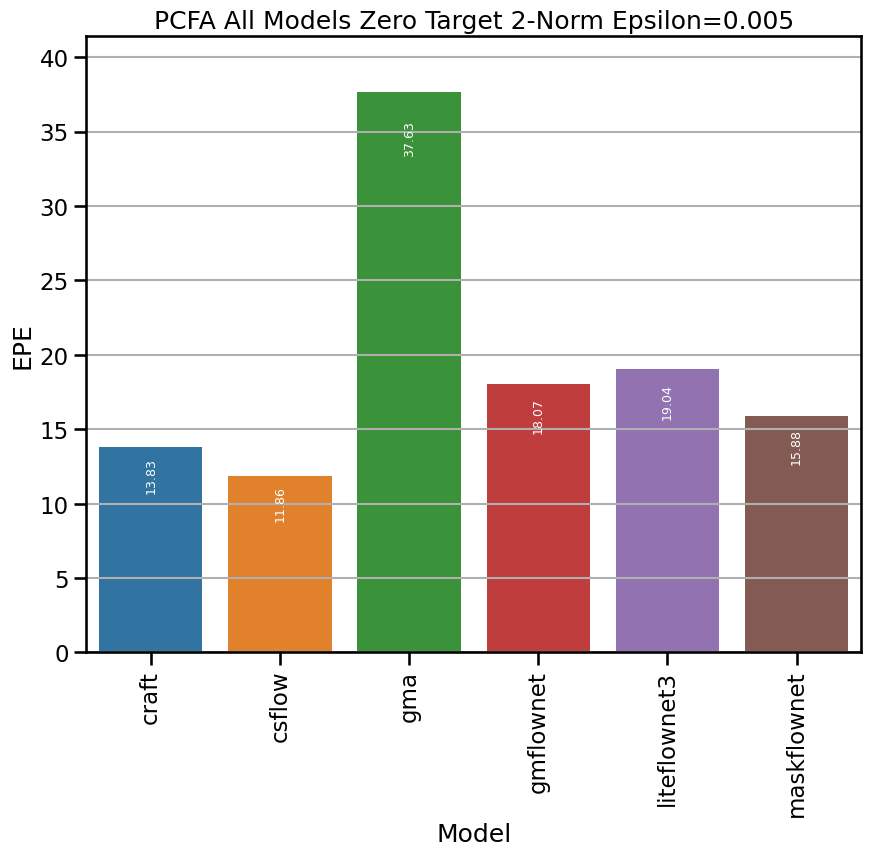

/scratch/ipykernel_488015/3077435207.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=data, x='model', y='epe', ci=None, palette='tab10')
/scratch/ipykernel_488015/3077435207.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=data, x='model', y='epe', ci=None, palette='tab10')


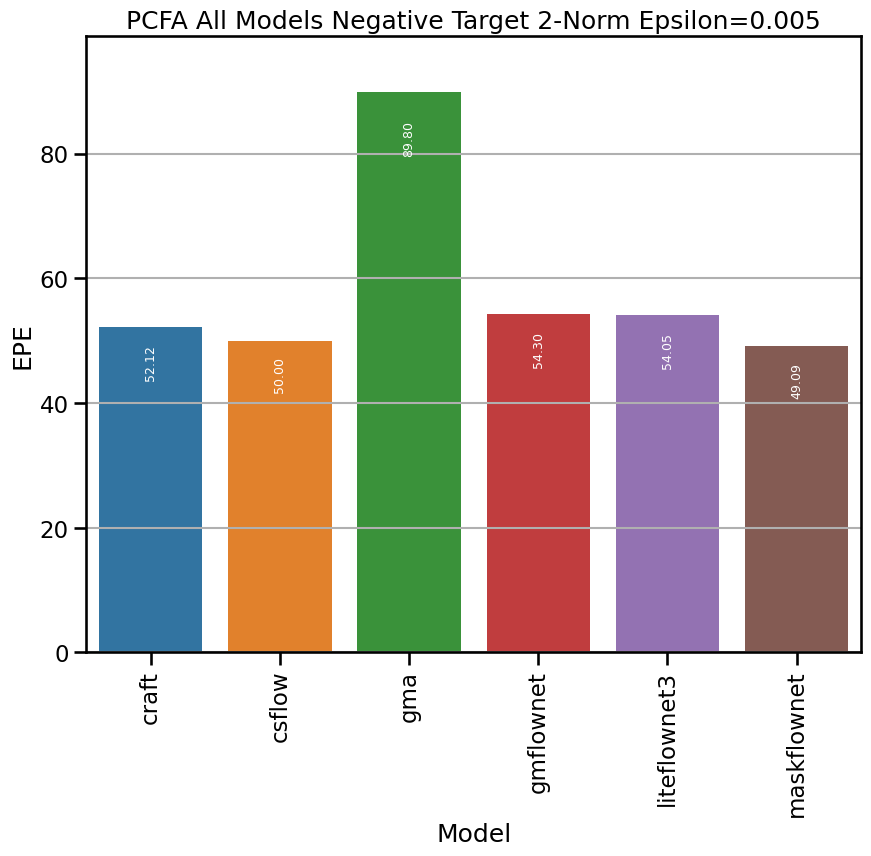

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_data(data, title, filename, specific_models=False):
    if data.empty:
        print(f"No data available for {title}. Skipping plot.")
        return

    # Create the plot
    plt.figure(figsize=(10, 8))
    bar_plot = sns.barplot(data=data, x='model', y='epe', ci=None, palette='tab10')

    # Customize the plot
    plt.xlabel('Model')
    plt.ylabel('EPE')
    plt.title(title)
    plt.grid(True, axis='y')

    # Rotate the x-axis labels to be vertical
    plt.xticks(rotation=90)

    # Annotate each bar with the y value within the bar at the top
    for bar in bar_plot.patches:
        bar_height = bar.get_height()
        if specific_models:
            bar_plot.text(
                bar.get_x() + bar.get_width() / 2,
                bar_height - bar_height * 0.10,  # Adjusted for better alignment
                f'{bar_height:.2f}',
                ha='center',
                va='top',
                rotation=0,  # Horizontal text
                color='white',
                fontsize=12  # Larger font size
            )
        else:
            bar_plot.text(
                bar.get_x() + bar.get_width() / 2,
                bar_height - bar_height * 0.05,
                f'{bar_height:.2f}',
                ha='center',
                va='top',
                rotation=90,  # Vertical text
                color='white',
                fontsize=9
            )

    # Adjust y-axis limit to make sure the annotations fit within the frame
    max_epe = data['epe'].max()
    plt.ylim(0, max_epe * 1.1)

    # Show the plot
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# Plot for targeted attack with target zero
data_target_zero = df.query("attack == 'pcfa' and targeted == True and target == 'zero' and dataset == 'kitti-2015' and checkpoint == 'kitti' and iterations == 20")
plot_data(data_target_zero, "PCFA All Models Zero Target 2-Norm Epsilon=0.005", 'graphs/PCFA All Models Zero Target 2-Norm.png')

# Plot for targeted attack with negative target
data_target_negative = df.query("attack == 'pcfa' and targeted == True and target == 'negative' and dataset == 'kitti-2015' and checkpoint == 'kitti' and iterations == 20")
plot_data(data_target_negative, "PCFA All Models Negative Target 2-Norm Epsilon=0.005", 'graphs/PCFA All Models Negative Target 2-Norm.png')
